In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import boxcox

In [3]:
# Load data
file_path = "/Users/zhanghan/Desktop/MSDS422 Final Project/OnlineNewsPopularity.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

In [5]:
# Display dataset information
print("Dataset Information:")
df.info()
print("\nFirst 5 rows:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords             

In [7]:
# Statistical summary
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
          timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  39644.000000    39644.000000      39644.000000     39644.000000   
mean     354.530471       10.398749        546.514731         0.548216   
std      214.163767        2.114037        471.107508         3.520708   
min        8.000000        2.000000          0.000000         0.000000   
25%      164.000000        9.000000        246.000000         0.470870   
50%      339.000000       10.000000        409.000000         0.539226   
75%      542.000000       12.000000        716.000000         0.608696   
max      731.000000       23.000000       8474.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      39644.000000              39644.000000  39644.000000   
mean           0.996469                  0.689175     10.883690   
std            5.231231                  3.264816     11.332017   
min            0.000000                  0.

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
if not missing_values.empty:
    print("\nMissing Values:")
    print(missing_values)
else:
    print("\nNo missing values found in the dataset.")


No missing values found in the dataset.


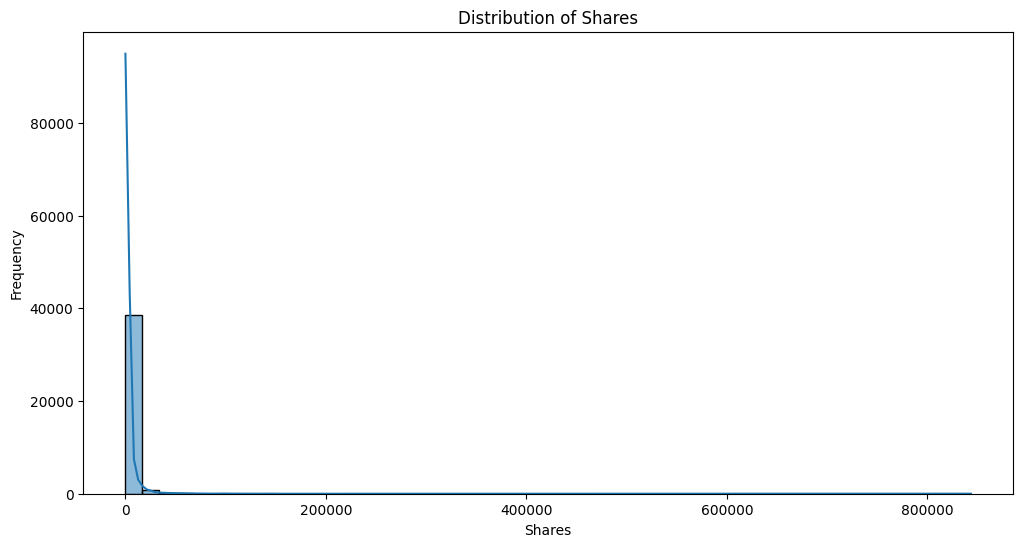

In [11]:
# Visualize the distribution of the target variable 'shares'
plt.figure(figsize=(12, 6))
sns.histplot(df['shares'], bins=50, kde=True)
plt.title("Distribution of Shares")
plt.xlabel("Shares")
plt.ylabel("Frequency")
plt.show()


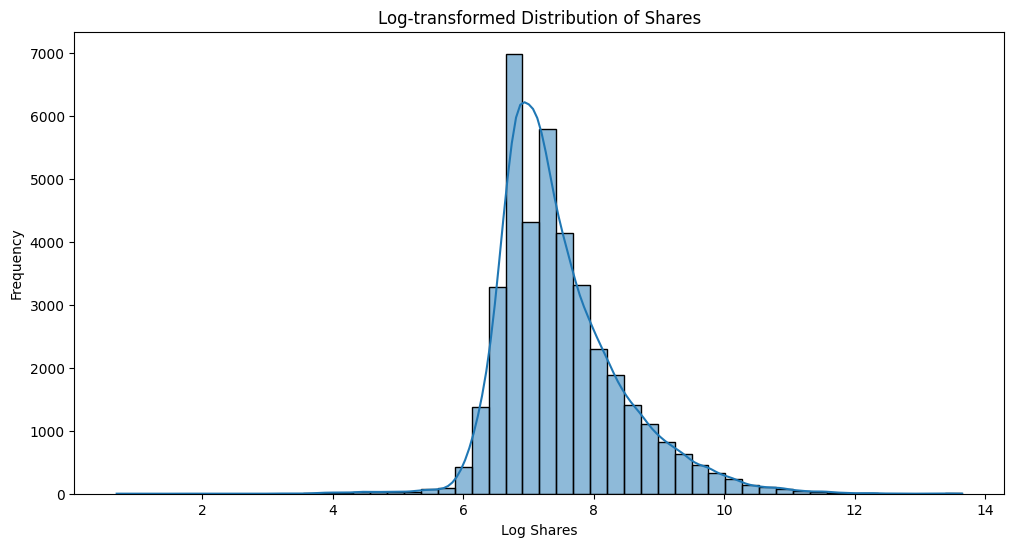

In [13]:
# Log-transform the 'shares' column to handle skewness
df['log_shares'] = np.log1p(df['shares'])
plt.figure(figsize=(12, 6))
sns.histplot(df['log_shares'], bins=50, kde=True)
plt.title("Log-transformed Distribution of Shares")
plt.xlabel("Log Shares")
plt.ylabel("Frequency")
plt.show()

Optimal lambda for Box-Cox: -0.21964795585426122


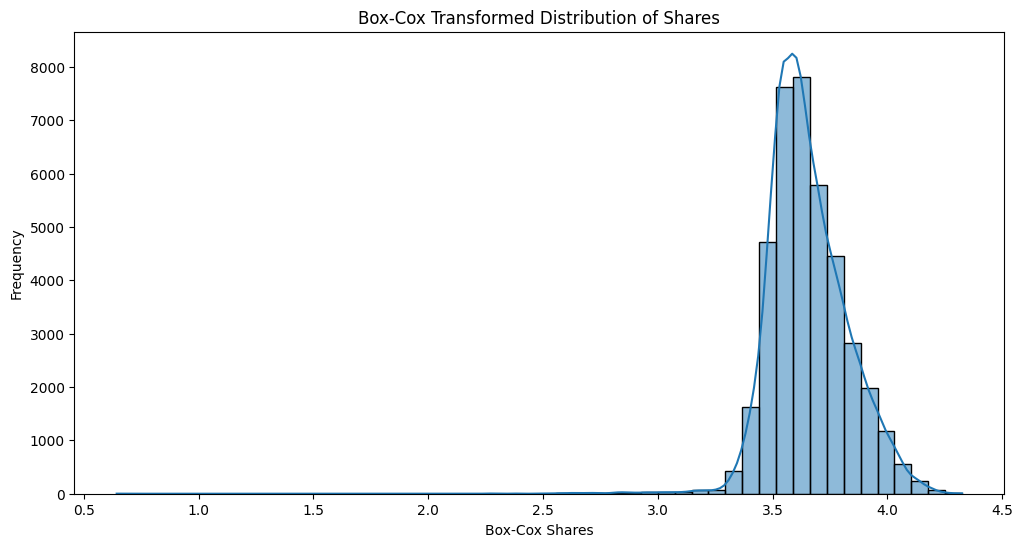

In [15]:
# Apply Box-Cox transformation to further normalize the distribution
df['boxcox_shares'], lambda_val = boxcox(df['shares'] + 1)  # Adding 1 to handle zero values
print(f"Optimal lambda for Box-Cox: {lambda_val}")
plt.figure(figsize=(12, 6))
sns.histplot(df['boxcox_shares'], bins=50, kde=True)
plt.title("Box-Cox Transformed Distribution of Shares")
plt.xlabel("Box-Cox Shares")
plt.ylabel("Frequency")
plt.show()

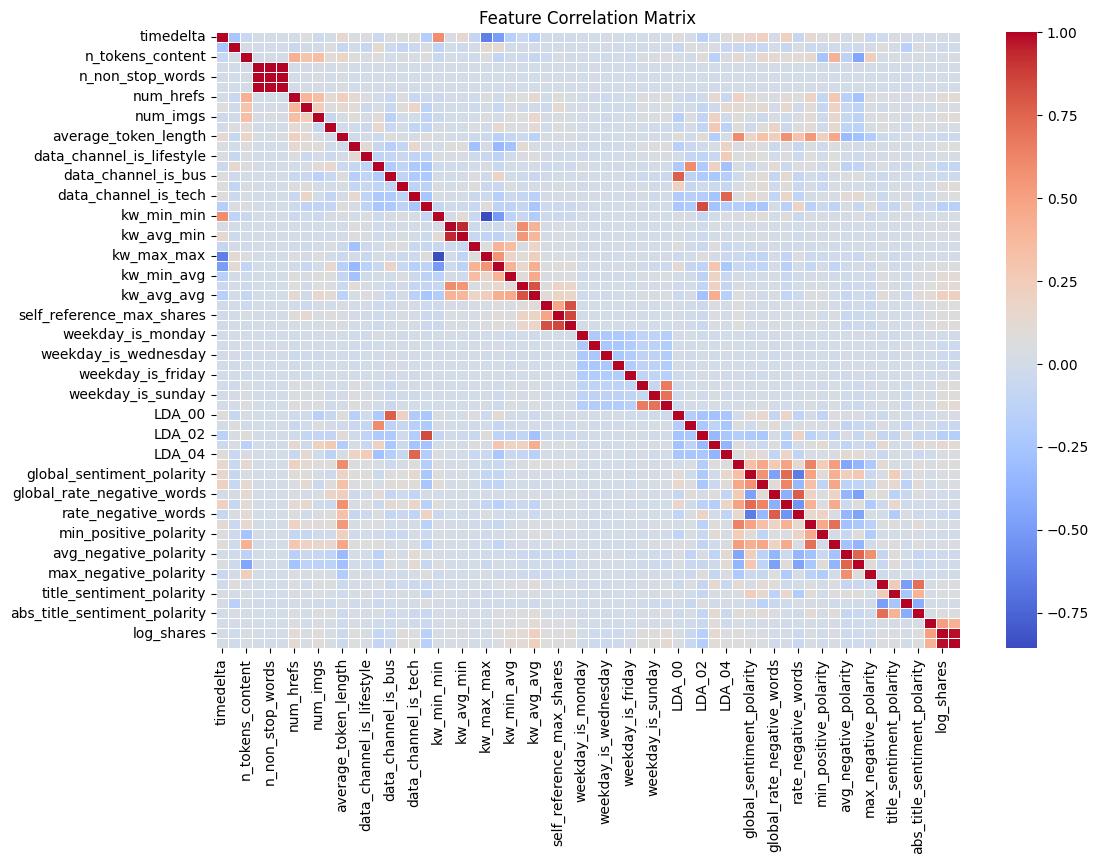

In [17]:
# Compute and visualize correlation matrix using only numerical columns
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [19]:
# Identify the most correlated feature pairs
high_corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
print("Top correlated feature pairs:")
print(high_corr_pairs[high_corr_pairs < 1].head(10))


Top correlated feature pairs:
n_non_stop_unique_tokens  n_unique_tokens             0.999852
n_unique_tokens           n_non_stop_unique_tokens    0.999852
n_non_stop_words          n_unique_tokens             0.999572
n_unique_tokens           n_non_stop_words            0.999572
n_non_stop_unique_tokens  n_non_stop_words            0.999532
n_non_stop_words          n_non_stop_unique_tokens    0.999532
log_shares                boxcox_shares               0.981244
boxcox_shares             log_shares                  0.981244
kw_max_min                kw_avg_min                  0.940529
kw_avg_min                kw_max_min                  0.940529
dtype: float64


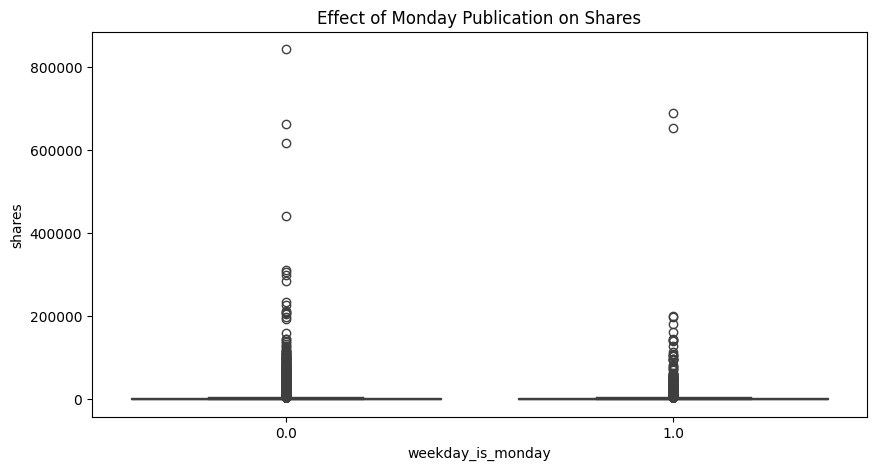

In [21]:
# Analyze effect of weekdays on shares
plt.figure(figsize=(10, 5))
sns.boxplot(x='weekday_is_monday', y='shares', data=df)
plt.title("Effect of Monday Publication on Shares")
plt.show()

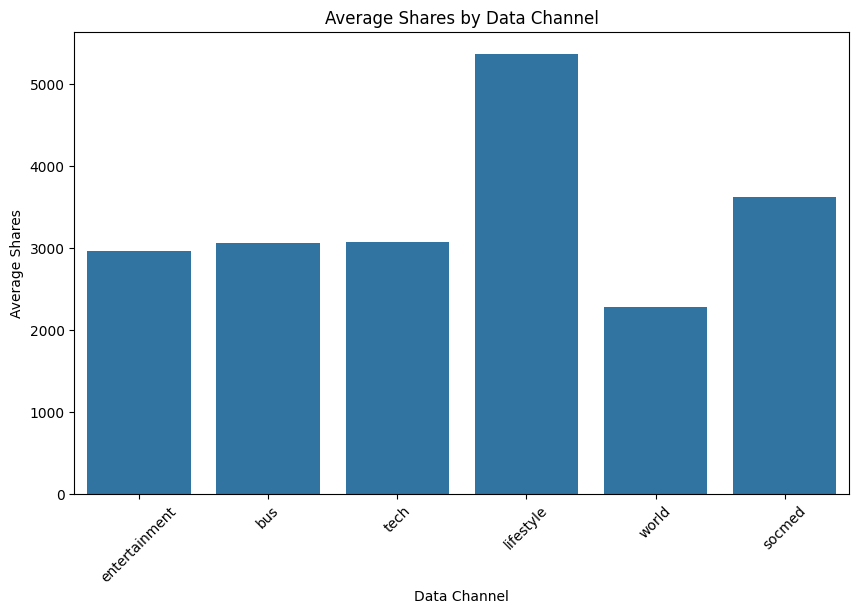

In [23]:
# Effect of data channel on shares
channels = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 
            'data_channel_is_bus', 'data_channel_is_socmed', 
            'data_channel_is_tech', 'data_channel_is_world']

df['data_channel'] = df[channels].idxmax(axis=1)
df['data_channel'] = df['data_channel'].str.replace('data_channel_is_', '')

plt.figure(figsize=(10, 6))
sns.barplot(x=df['data_channel'], y=df['shares'], estimator=np.mean, errorbar=None)
plt.title("Average Shares by Data Channel")
plt.xlabel("Data Channel")
plt.ylabel("Average Shares")
plt.xticks(rotation=45)
plt.show()

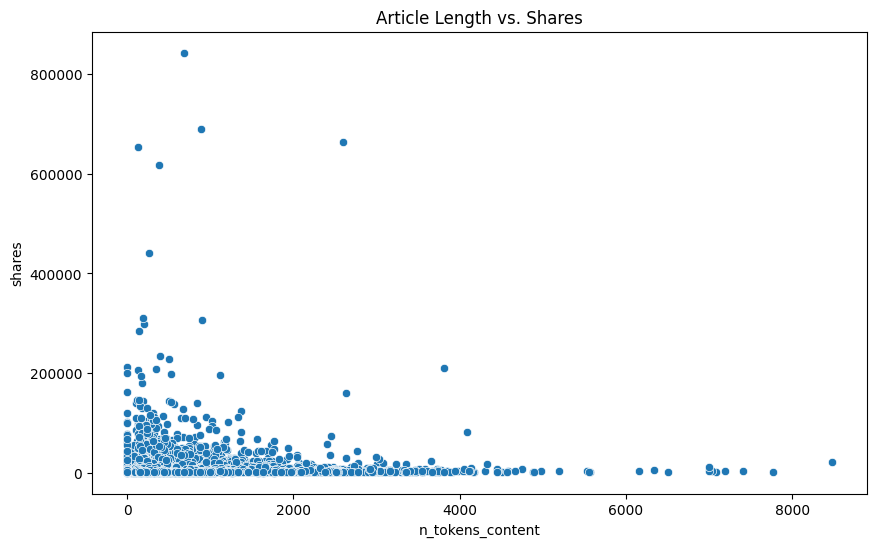

In [25]:
# Scatterplot to visualize the relationship between article length and shares
plt.figure(figsize=(10, 6))
sns.scatterplot(x='n_tokens_content', y='shares', data=df)
plt.title("Article Length vs. Shares")
plt.show()


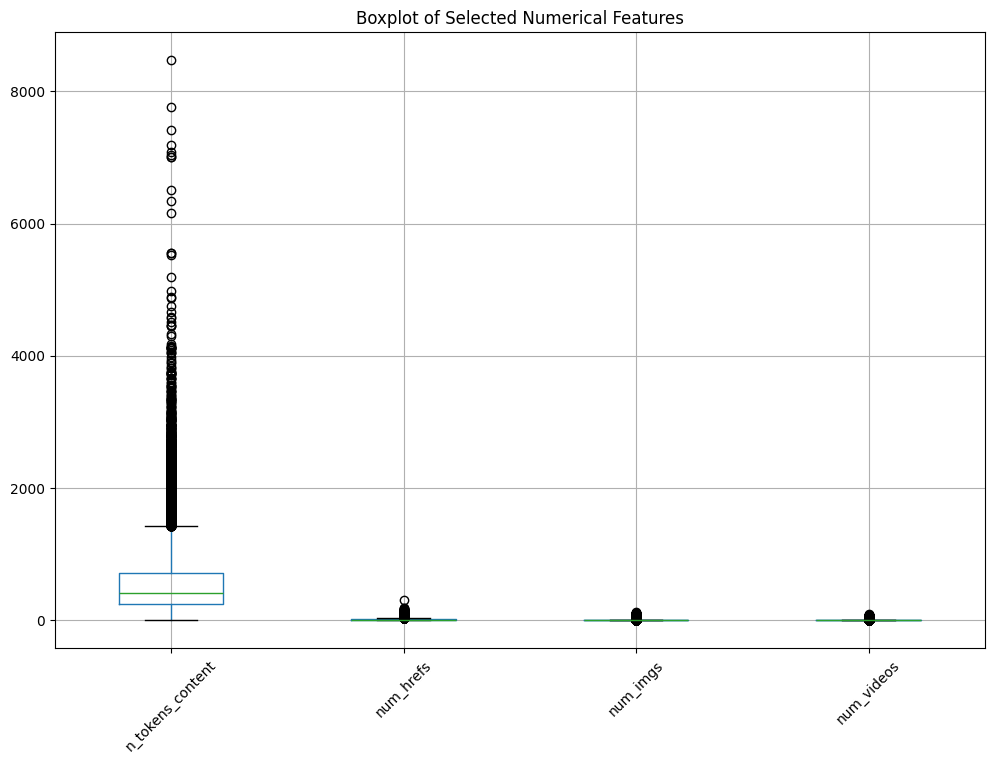

In [27]:
# Boxplot for selected numerical features
numerical_features = ['n_tokens_content', 'num_hrefs', 'num_imgs', 'num_videos']
plt.figure(figsize=(12, 8))
df[numerical_features].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Selected Numerical Features")
plt.show()

In [29]:
# Detect outliers using the IQR method
Q1 = df['shares'].quantile(0.25)
Q3 = df['shares'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['shares'] < (Q1 - 1.5 * IQR)) | (df['shares'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers using IQR: {len(outliers)}")



Number of outliers using IQR: 4541


In [31]:
# Detect outliers using Z-score
df['zscore'] = stats.zscore(df['shares'])
outliers_zscore = df[df['zscore'].abs() > 3]
print(f"Number of outliers using Z-score: {len(outliers_zscore)}")

Number of outliers using Z-score: 308


In [33]:
# Compute correlation between all variables and 'shares'
corr_with_shares = numeric_df.corr()['shares'].sort_values(ascending=False)
print(corr_with_shares.head(15))
print(corr_with_shares.tail(15))

shares                        1.000000
log_shares                    0.510181
boxcox_shares                 0.416169
kw_avg_avg                    0.110413
LDA_03                        0.083771
kw_max_avg                    0.064306
self_reference_avg_sharess    0.057789
self_reference_min_shares     0.055958
self_reference_max_shares     0.047115
num_hrefs                     0.045404
kw_avg_max                    0.044686
kw_min_avg                    0.039551
num_imgs                      0.039388
global_subjectivity           0.031604
kw_avg_min                    0.030406
Name: shares, dtype: float64
rate_negative_words             -0.005183
weekday_is_tuesday              -0.007941
weekday_is_thursday             -0.008833
LDA_01                          -0.010183
data_channel_is_bus             -0.012376
rate_positive_words             -0.013241
data_channel_is_tech            -0.013253
LDA_04                          -0.016622
data_channel_is_entertainment   -0.017006
min_nega

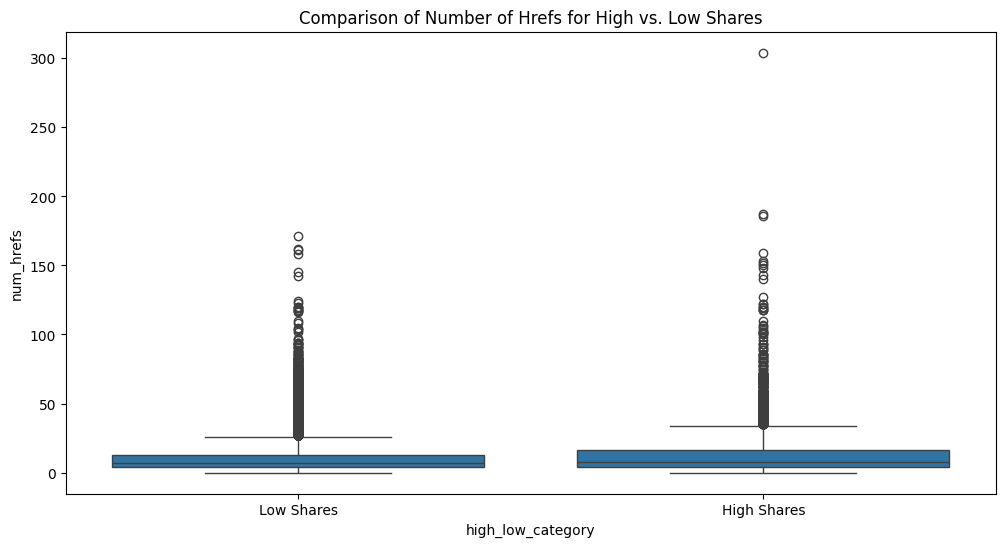

In [35]:
# High vs. Low shares comparison
threshold_high = df['shares'].quantile(0.75)
threshold_low = df['shares'].quantile(0.25)

df['high_low_category'] = np.where(df['shares'] > threshold_high, 'High Shares', 'Low Shares')

plt.figure(figsize=(12, 6))
sns.boxplot(x='high_low_category', y='num_hrefs', data=df)
plt.title("Comparison of Number of Hrefs for High vs. Low Shares")
plt.show()

In [37]:
# Ensure 'shares_category' column exists for grouping
q1 = df['shares'].quantile(0.25)  # First quartile
q2 = df['shares'].quantile(0.5)   # Median
q3 = df['shares'].quantile(0.75)  # Third quartile

# Create categorical variable for shares
df['shares_category'] = pd.cut(df['shares'], 
                               bins=[0, q1, q2, q3, df['shares'].max()], 
                               labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Verify creation of 'shares_category'
print(df['shares_category'].value_counts())  # Check distribution of categories

shares_category
Medium-Low     10152
Medium-High     9932
Low             9930
High            9630
Name: count, dtype: int64


/var/folders/rx/dz1397bs44z9hjxmz4f5jm1m0000gn/T/ipykernel_86964/40519870.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('shares_category')[selected_features].mean().plot(kind='bar', ax=axes[0])
/var/folders/rx/dz1397bs44z9hjxmz4f5jm1m0000gn/T/ipykernel_86964/40519870.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('shares_category')['log_shares'].mean().plot(kind='bar', ax=axes[1], color='green')


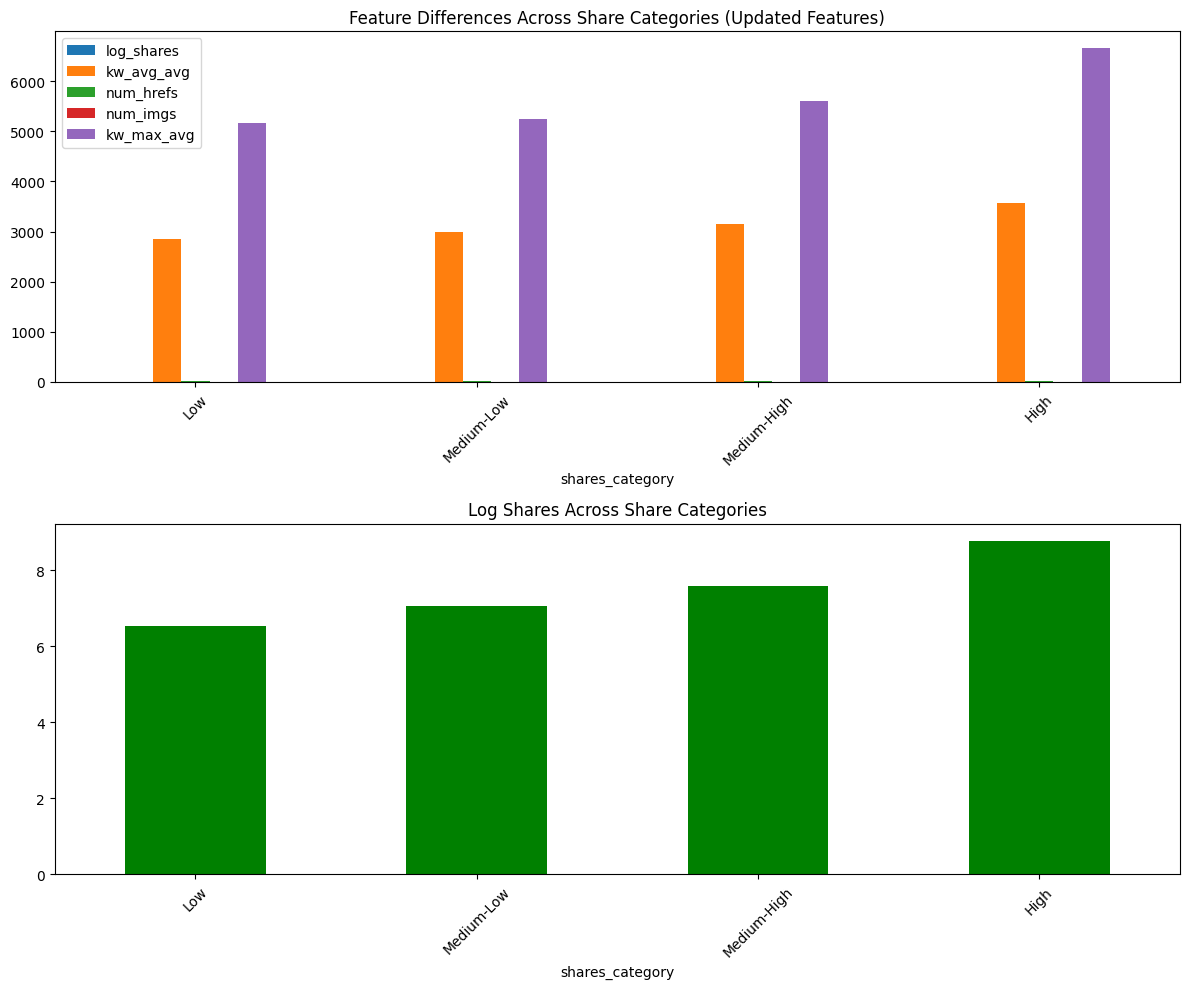

In [39]:
# Visualizing feature differences across share categories using subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Select features based on correlation analysis
selected_features = ['log_shares', 'kw_avg_avg', 'num_hrefs', 'num_imgs', 'kw_max_avg']

# Plot bar chart for selected features across share categories
df.groupby('shares_category')[selected_features].mean().plot(kind='bar', ax=axes[0])
axes[0].set_title("Feature Differences Across Share Categories (Updated Features)")
axes[0].tick_params(axis='x', rotation=45)

# Plot mean log_shares across categories separately
df.groupby('shares_category')['log_shares'].mean().plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title("Log Shares Across Share Categories")
axes[1].tick_params(axis='x', rotation=45)

# Improve layout and display
plt.tight_layout()
plt.show()

In [41]:
df.info()# List of feature names to convert to boolean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   url                            39644 non-null  object  
 1   timedelta                      39644 non-null  float64 
 2   n_tokens_title                 39644 non-null  float64 
 3   n_tokens_content               39644 non-null  float64 
 4   n_unique_tokens                39644 non-null  float64 
 5   n_non_stop_words               39644 non-null  float64 
 6   n_non_stop_unique_tokens       39644 non-null  float64 
 7   num_hrefs                      39644 non-null  float64 
 8   num_self_hrefs                 39644 non-null  float64 
 9   num_imgs                       39644 non-null  float64 
 10  num_videos                     39644 non-null  float64 
 11  average_token_length           39644 non-null  float64 
 12  num_keywords                   3

In [43]:
bool_features = [
    "weekday_is_monday",
    "weekday_is_tuesday",
    "weekday_is_wednesday",
    "weekday_is_thursday",
    "weekday_is_friday",
    "weekday_is_saturday",
    "weekday_is_sunday",
    "is_weekend",
    "data_channel_is_lifestyle",
    "data_channel_is_entertainment",
    "data_channel_is_bus",
    "data_channel_is_socmed",
    "data_channel_is_tech",
    "data_channel_is_world"
]

# Convert each feature to boolean type
for col in bool_features:
    if col in df.columns:
        df[col] = df[col].astype(bool)
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   url                            39644 non-null  object  
 1   timedelta                      39644 non-null  float64 
 2   n_tokens_title                 39644 non-null  float64 
 3   n_tokens_content               39644 non-null  float64 
 4   n_unique_tokens                39644 non-null  float64 
 5   n_non_stop_words               39644 non-null  float64 
 6   n_non_stop_unique_tokens       39644 non-null  float64 
 7   num_hrefs                      39644 non-null  float64 
 8   num_self_hrefs                 39644 non-null  float64 
 9   num_imgs                       39644 non-null  float64 
 10  num_videos                     39644 non-null  float64 
 11  average_token_length           39644 non-null  float64 
 12  num_keywords                   3

In [47]:
train = df.drop(['url', 'timedelta','shares_category','shares'], axis=1)

Missing values in each feature:
Series([], dtype: int64)


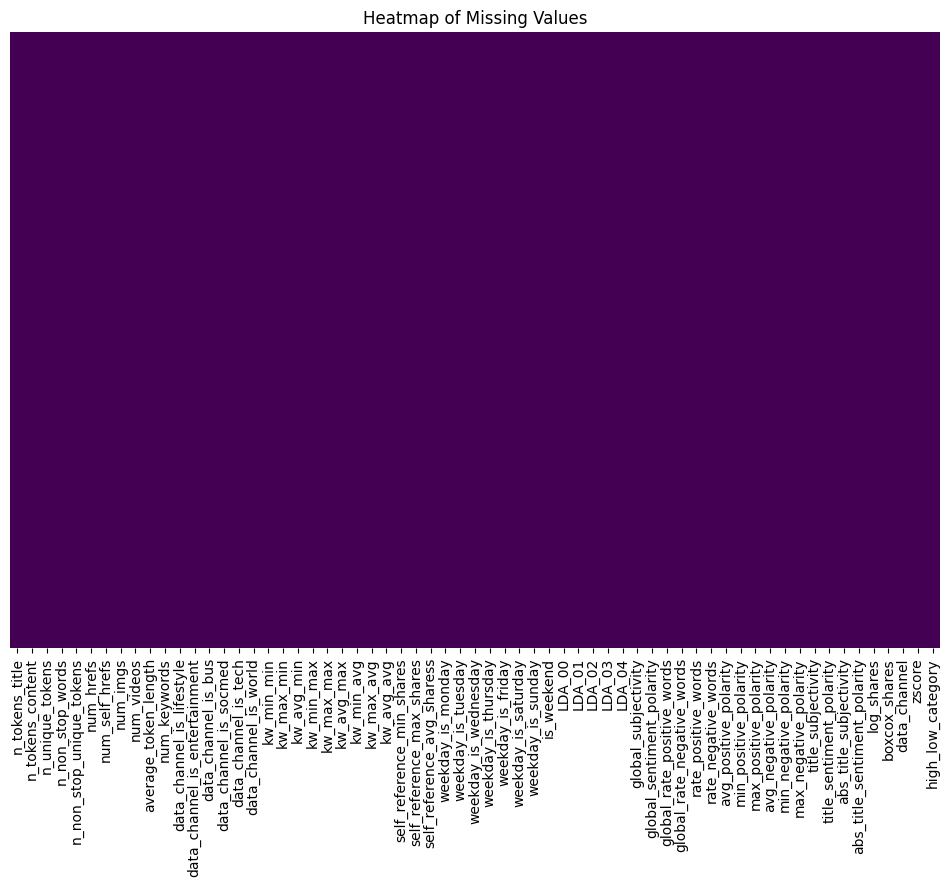

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is already defined and loaded with data

# 1. Calculate and print the missing values for each feature
missing_values = train.isnull().sum()
print("Missing values in each feature:")
print(missing_values[missing_values > 0])  # Only print features with missing values

# 3. Heatmap for Missing Values
plt.figure(figsize=(12, 8))
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()

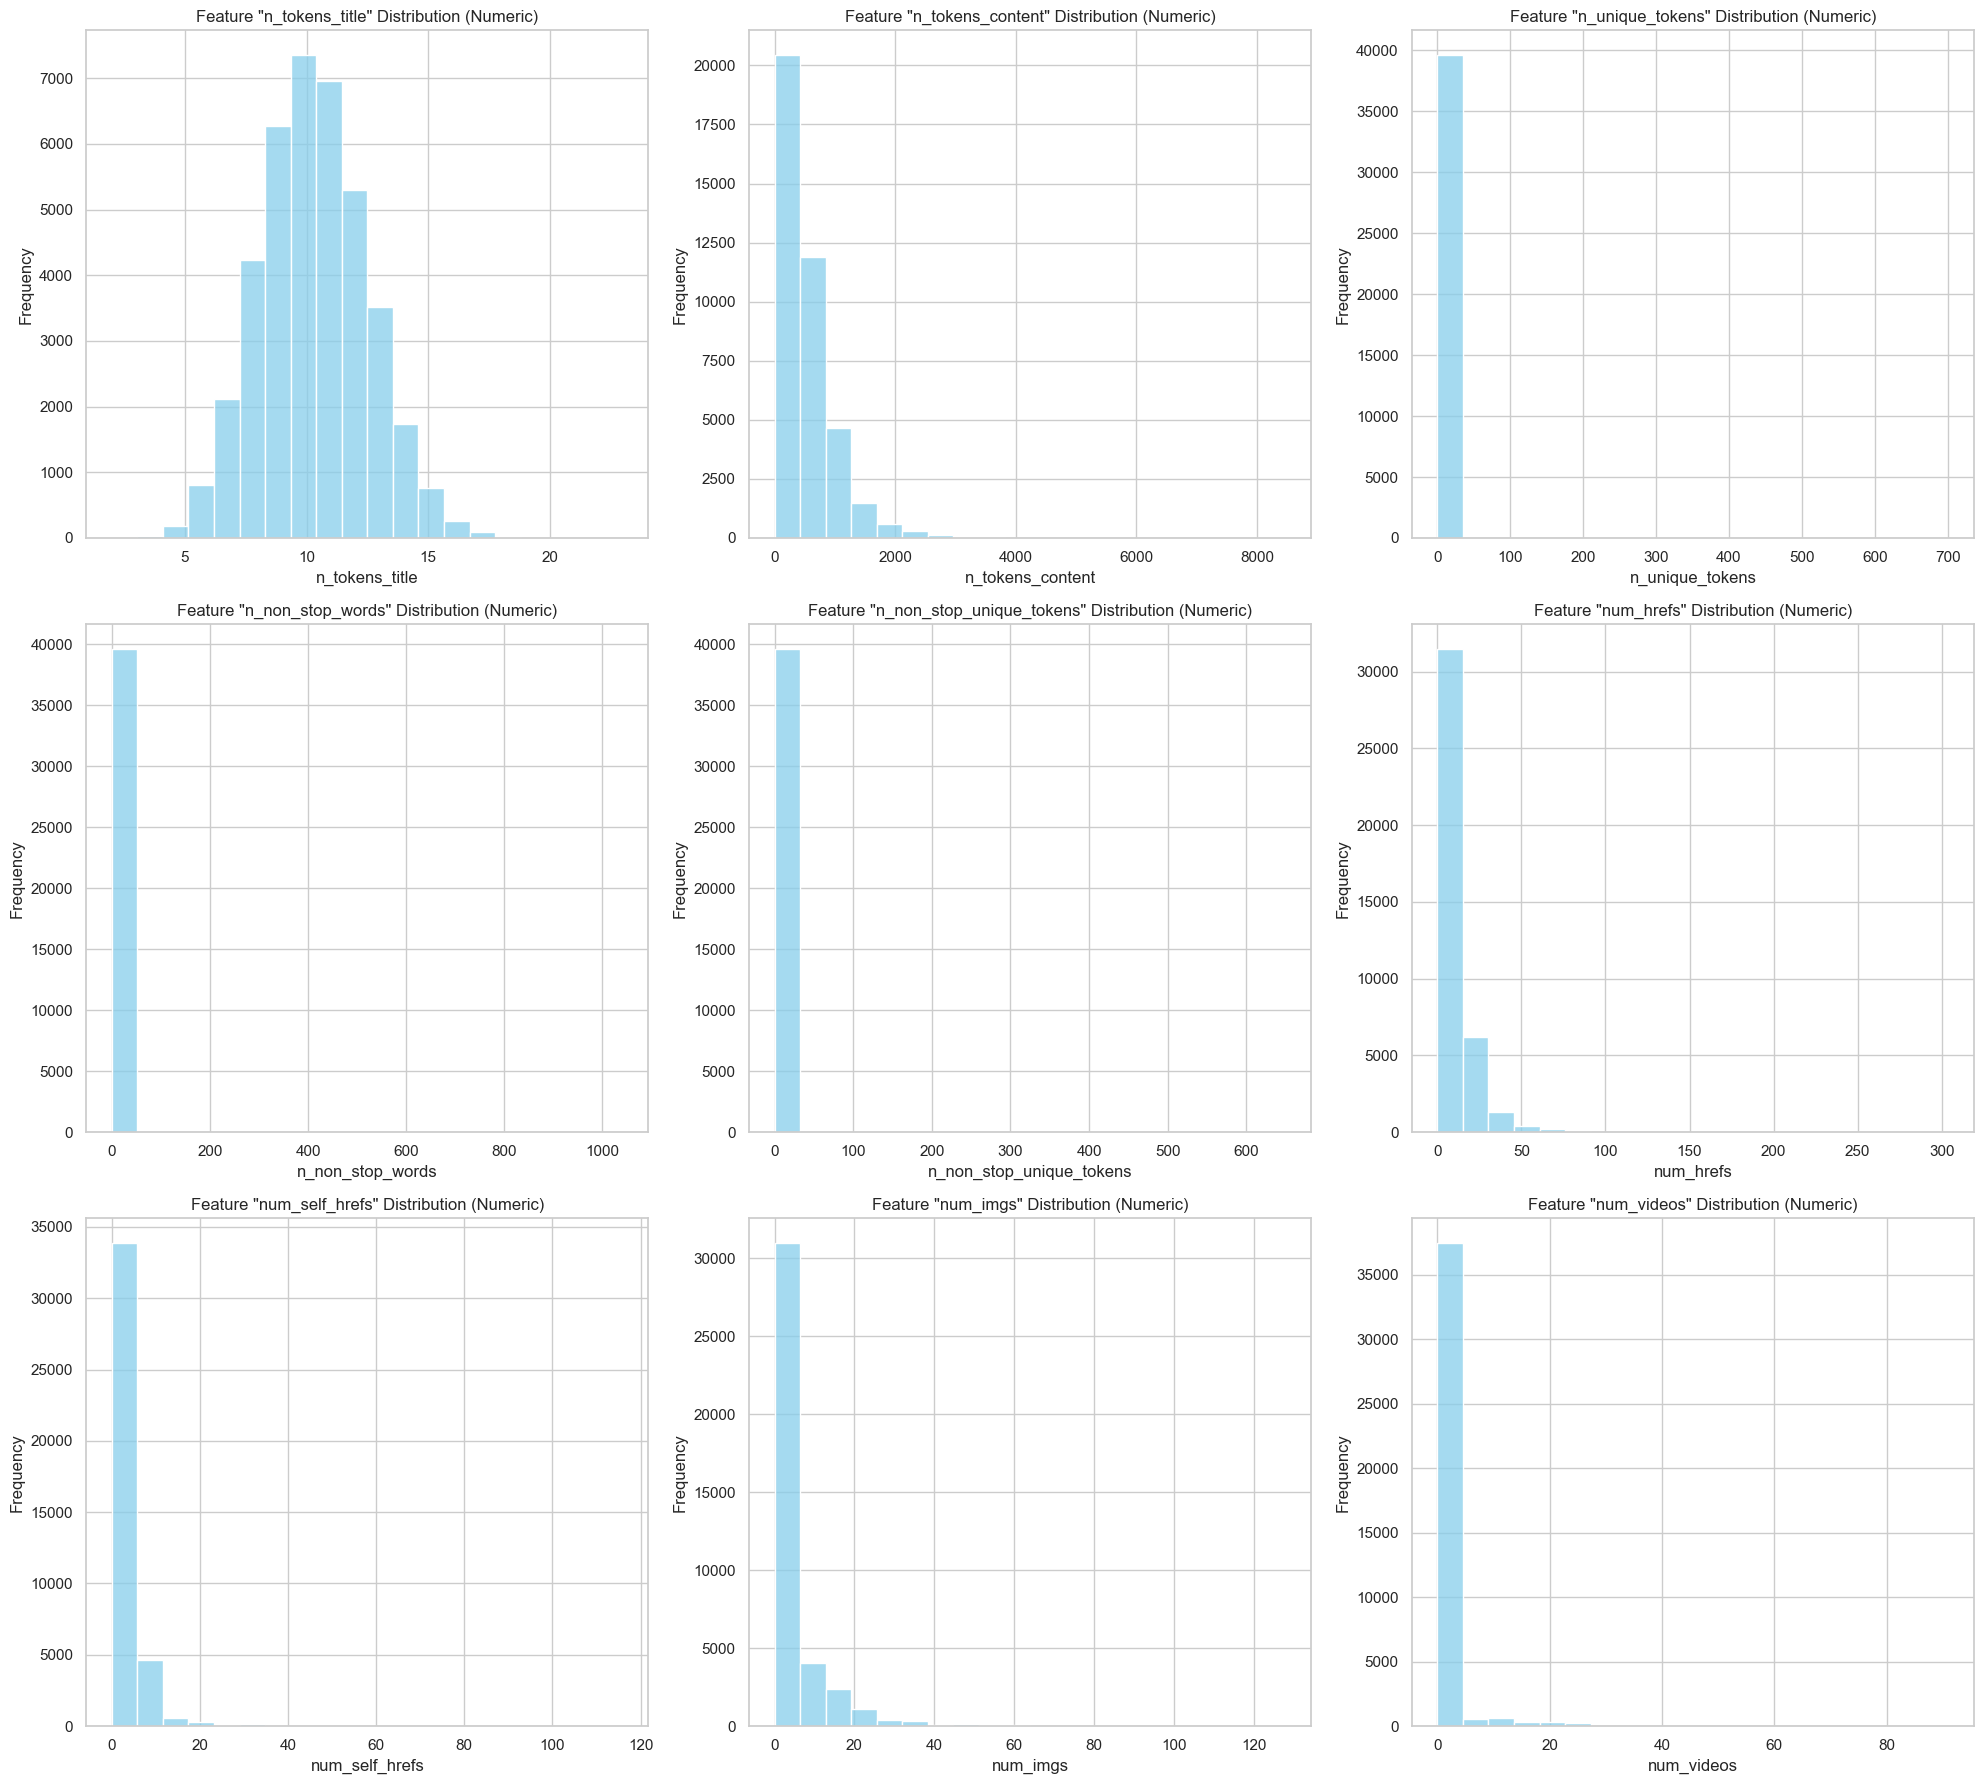

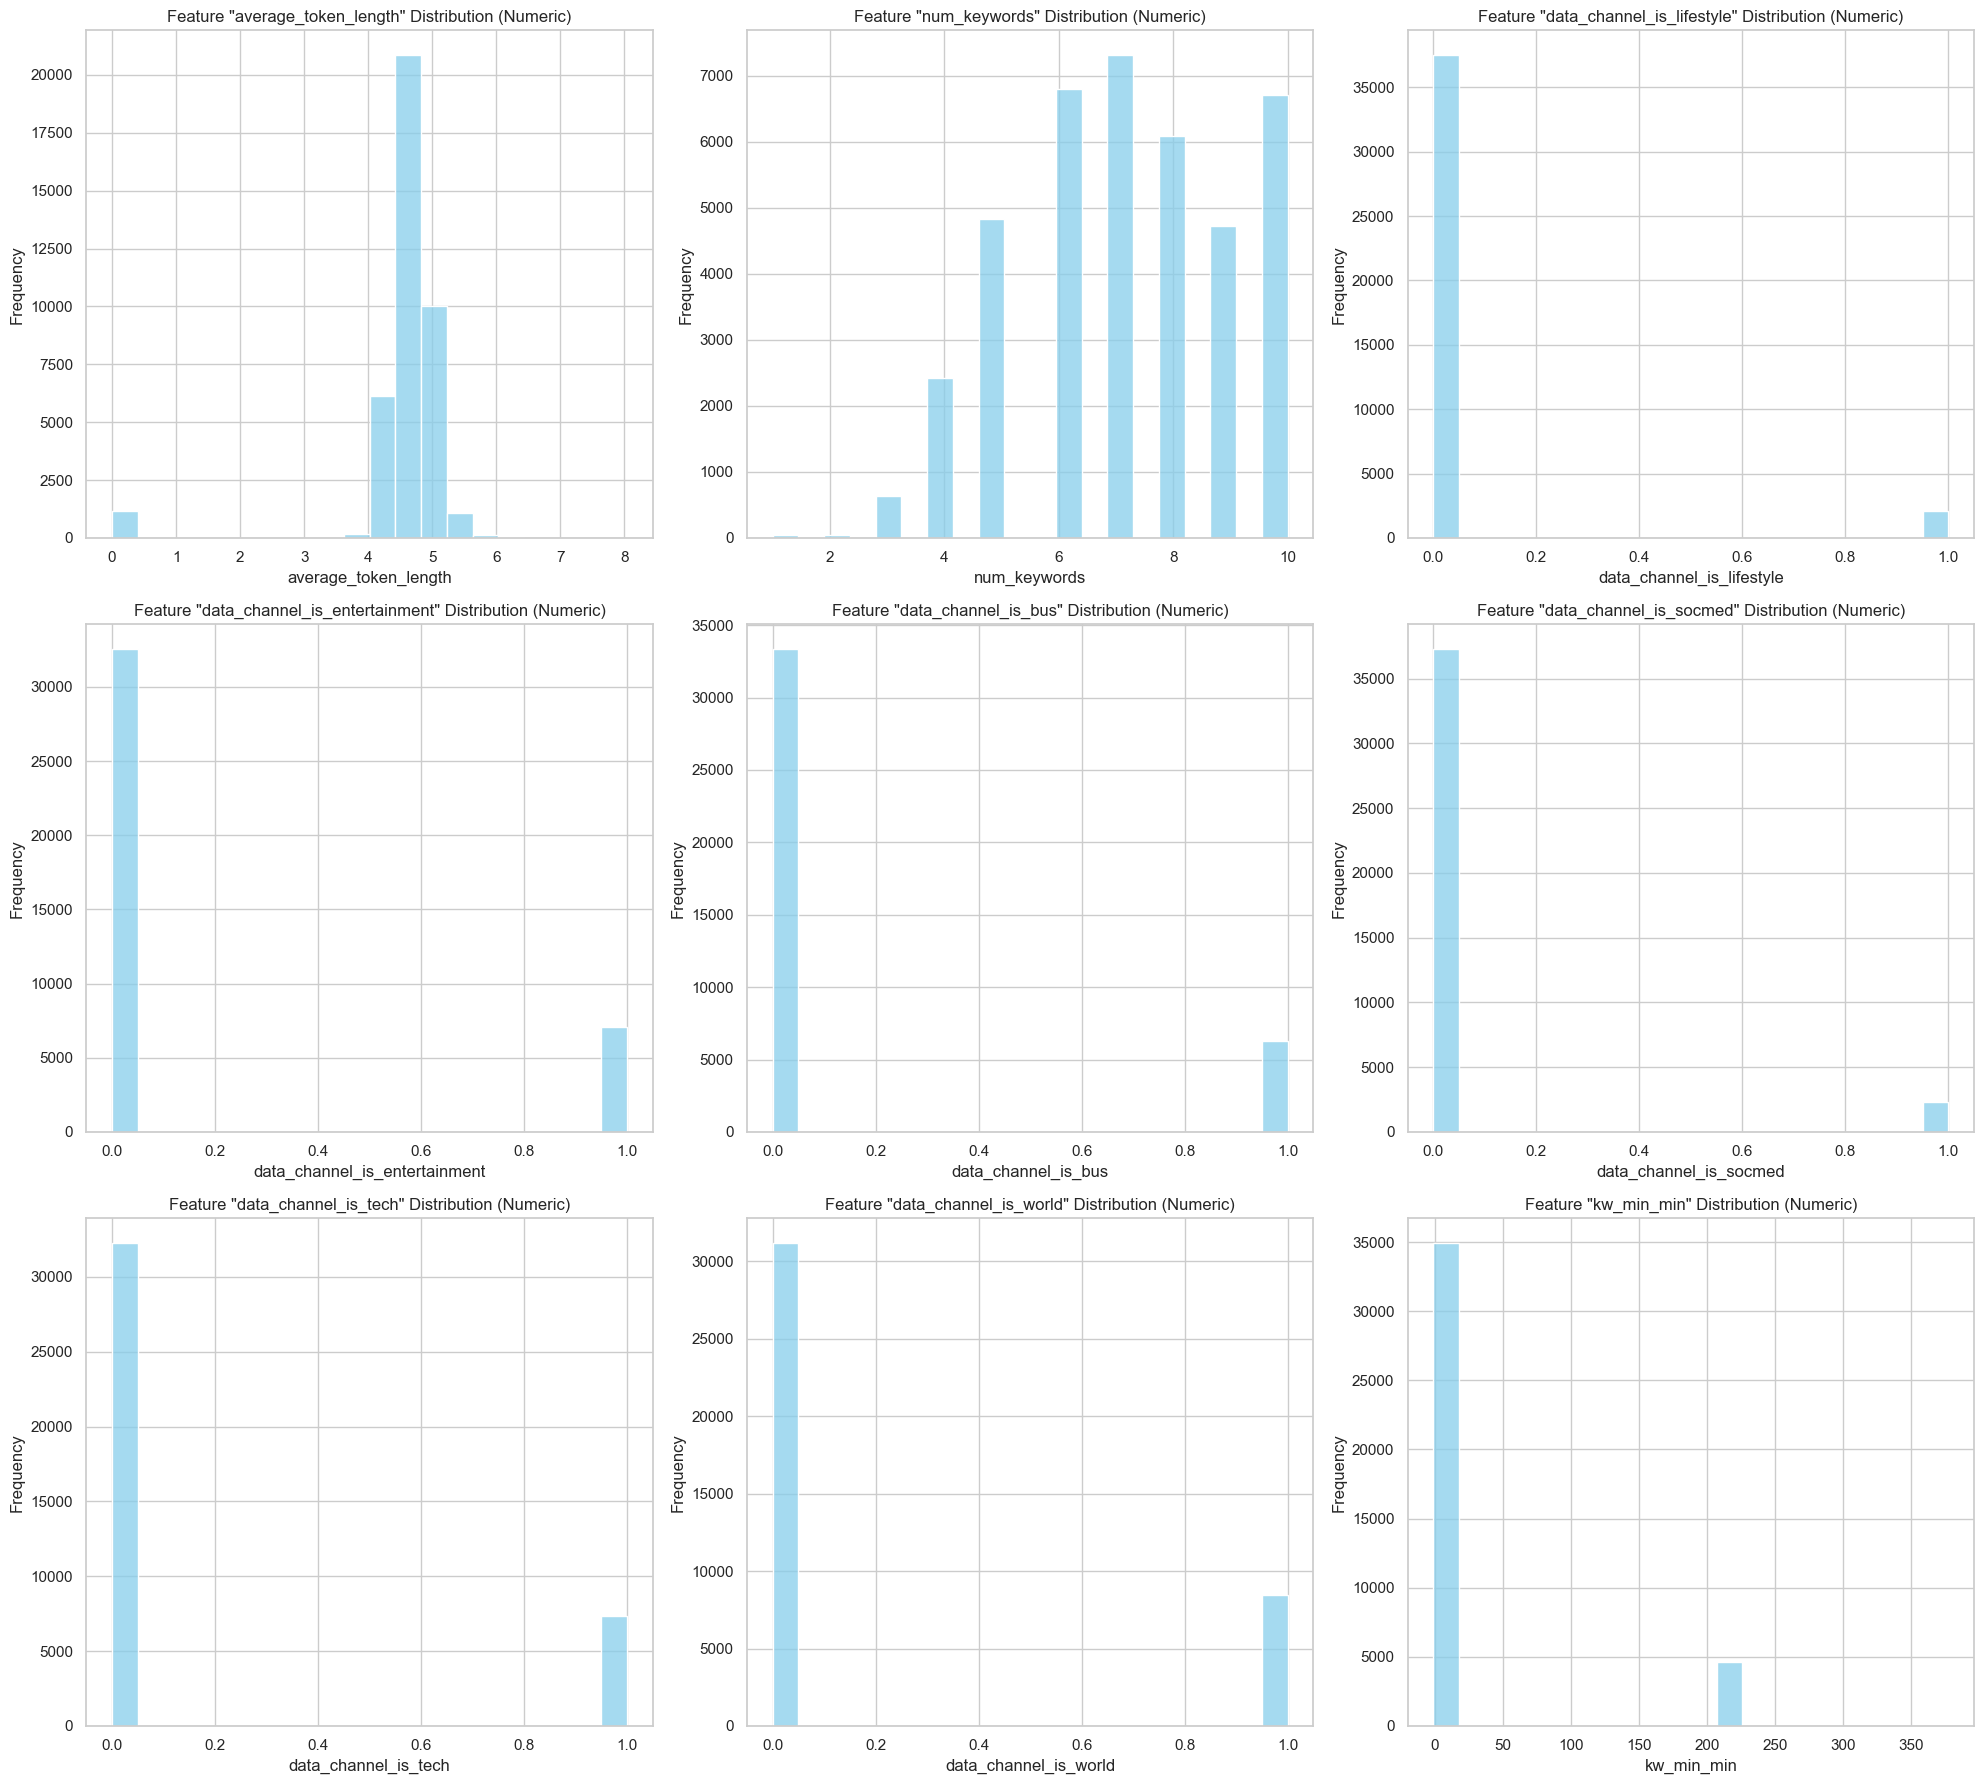

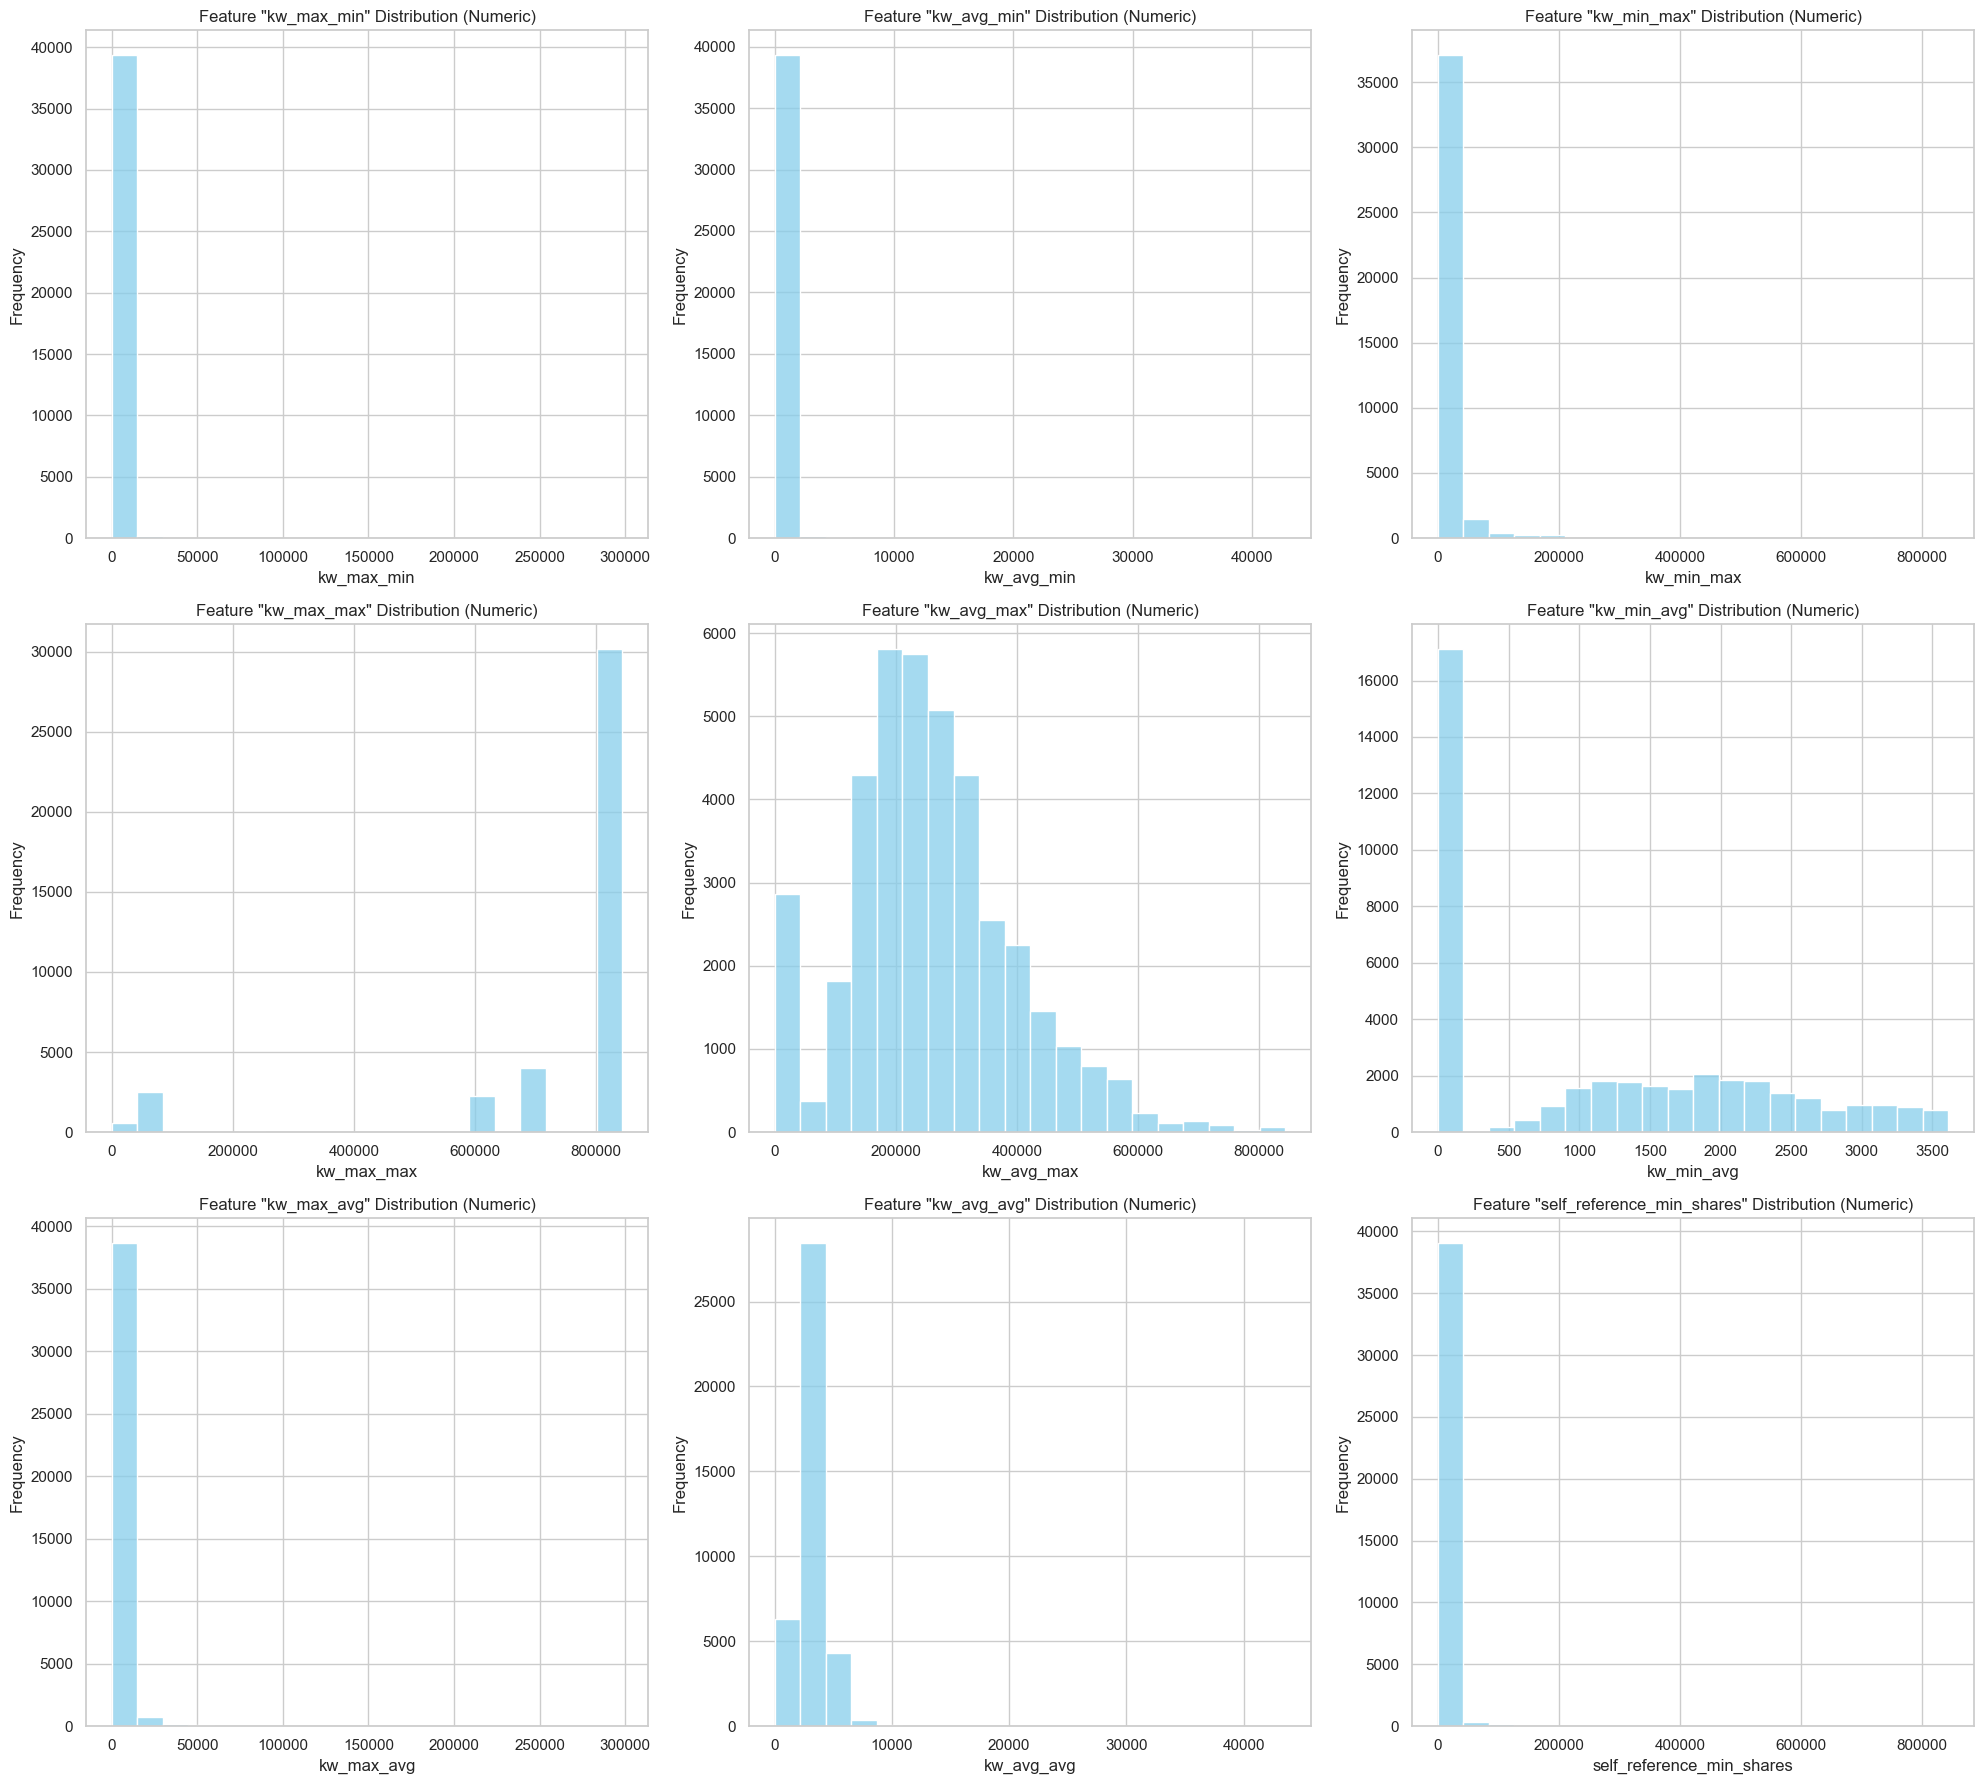

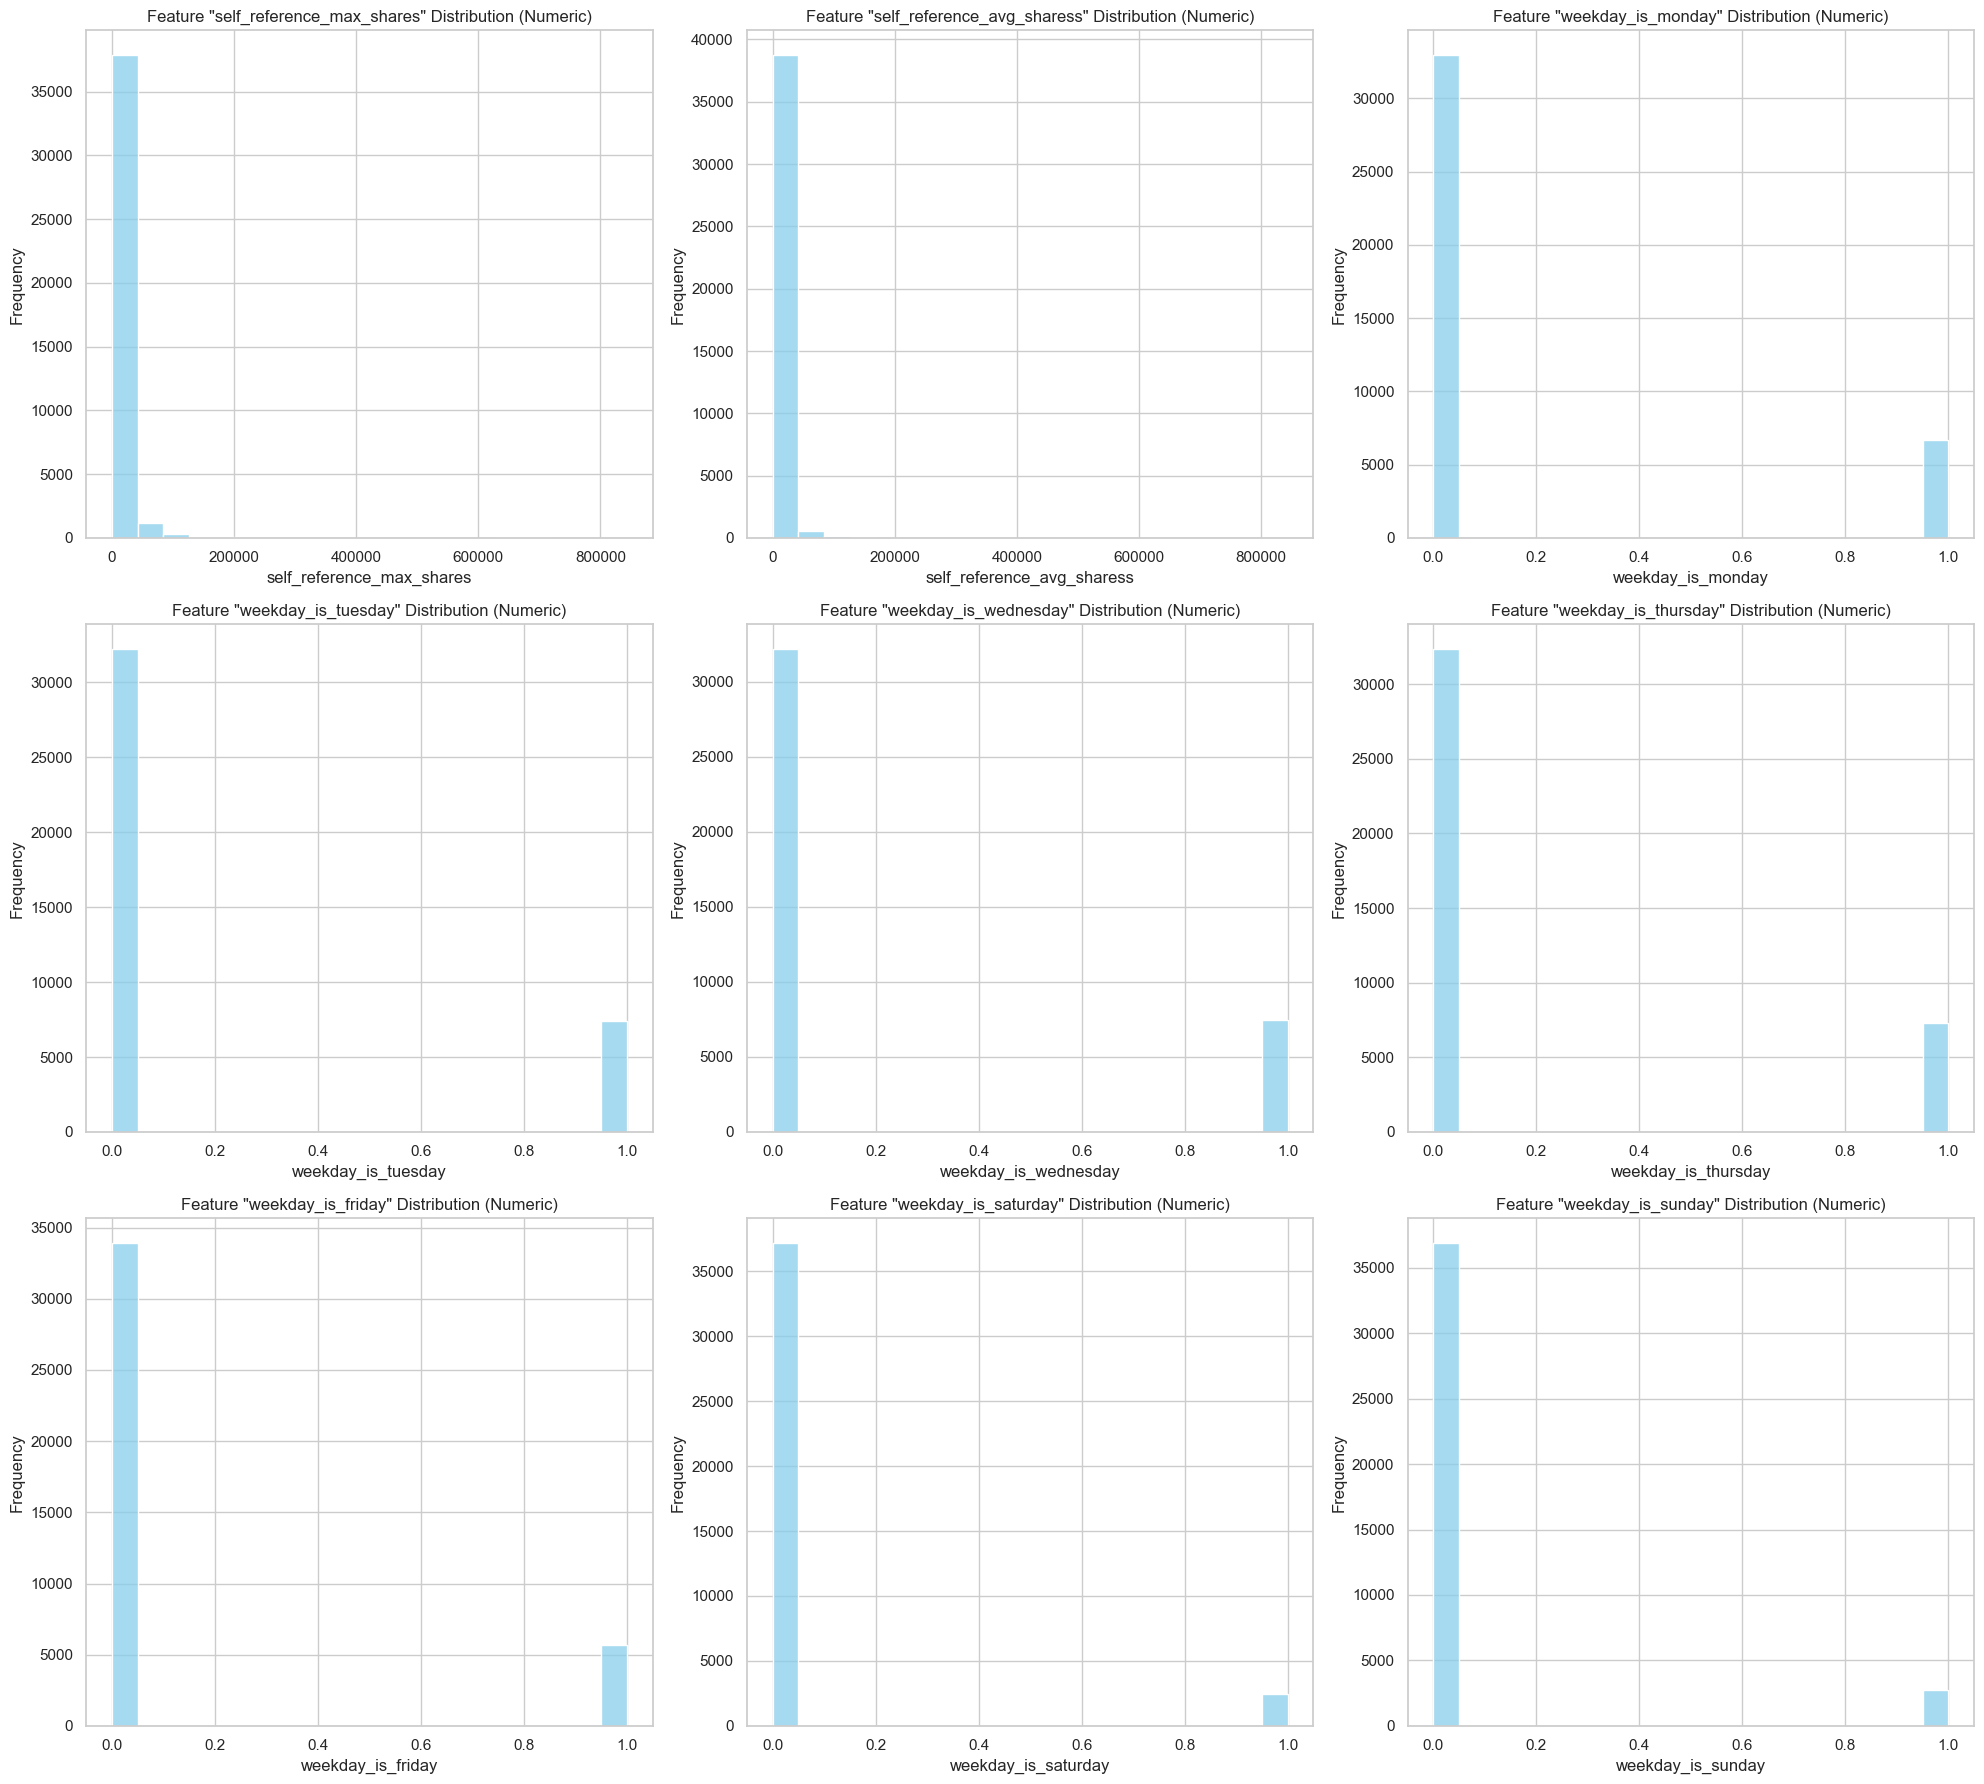

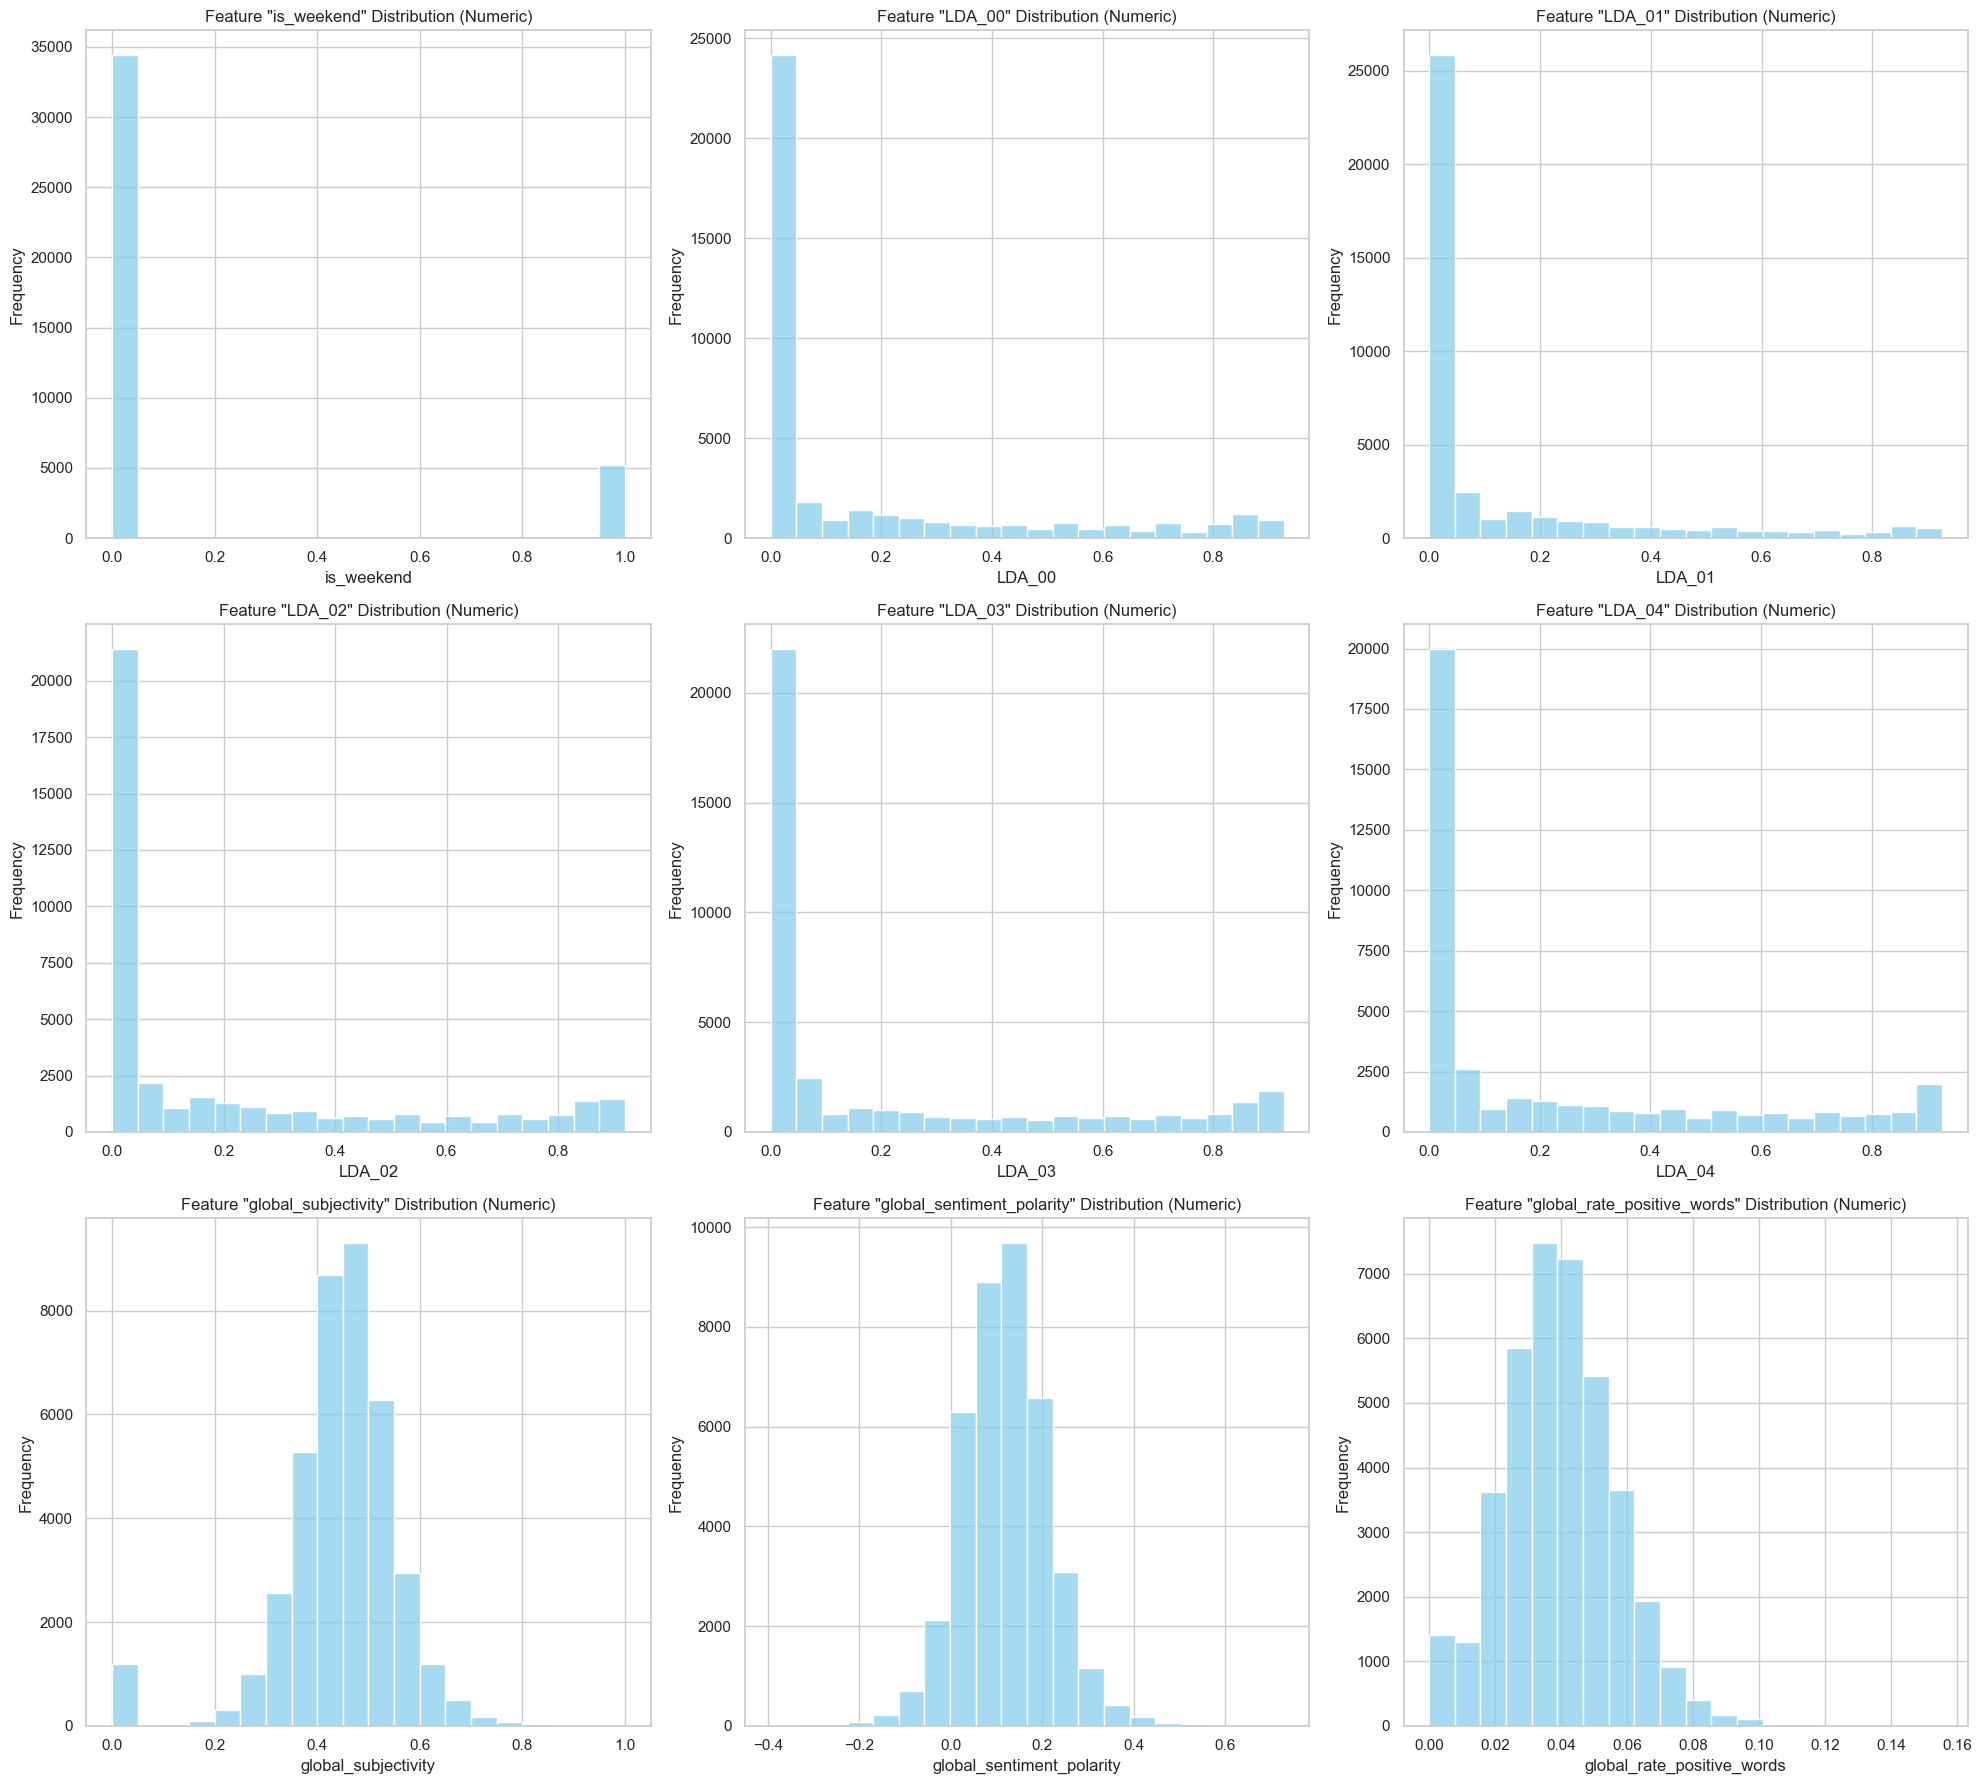

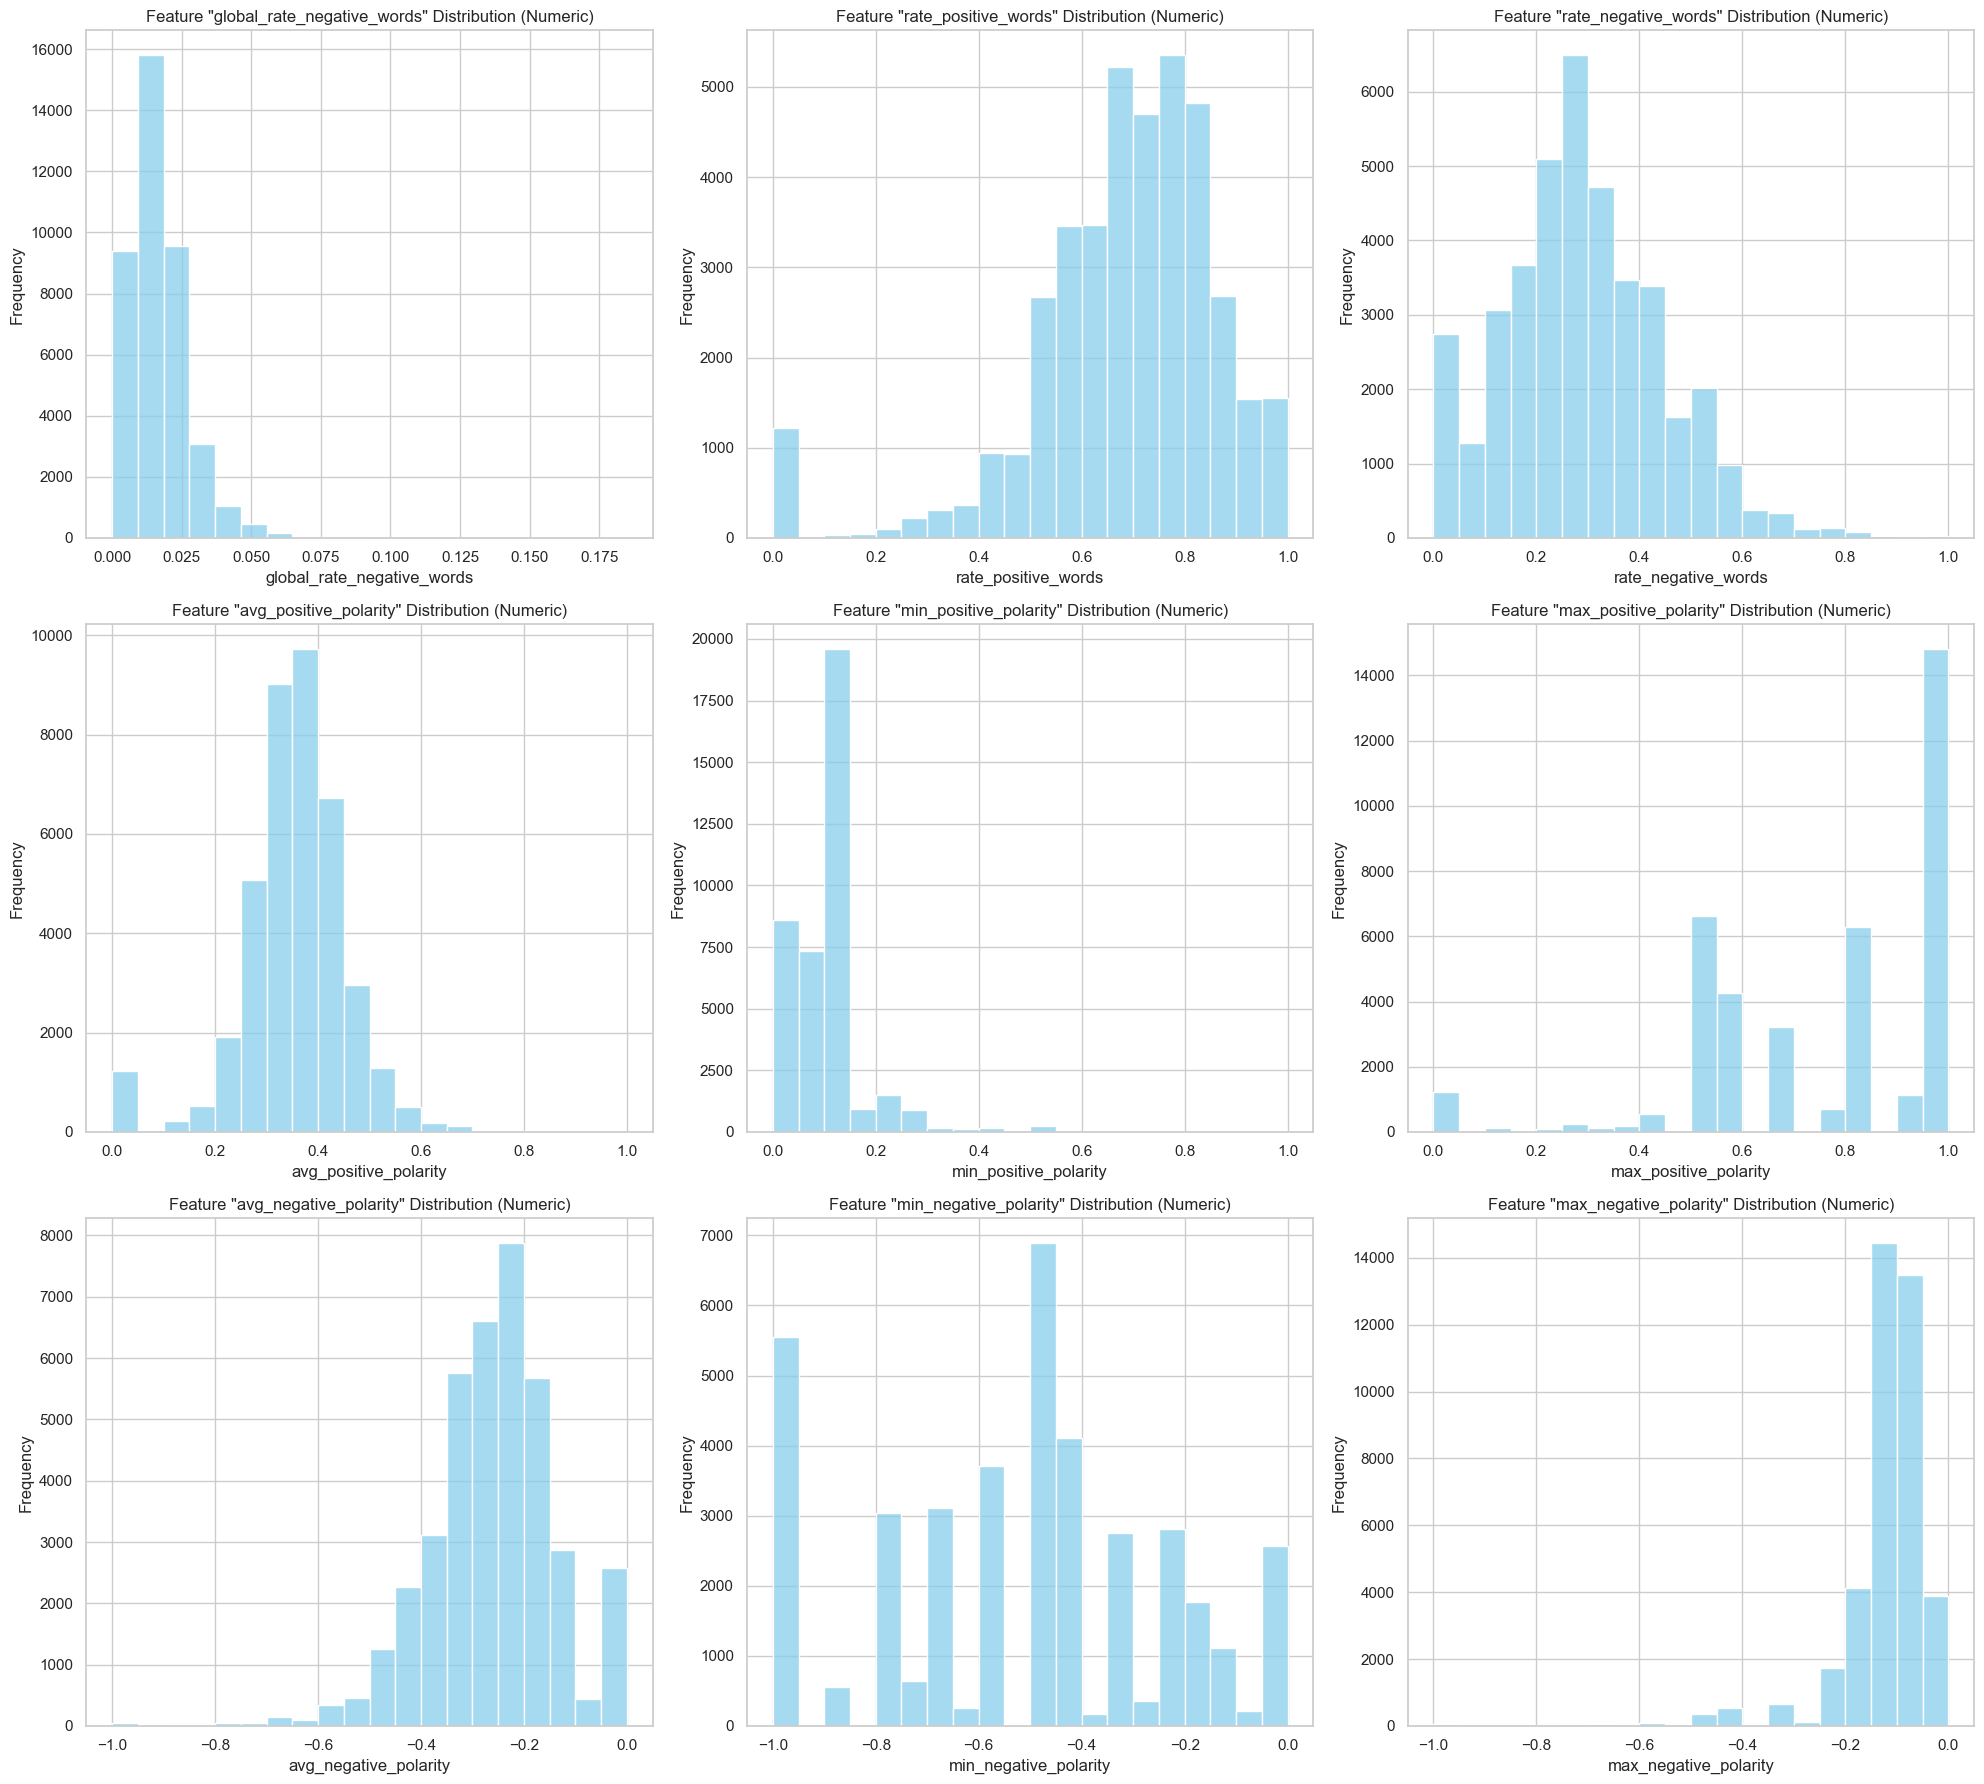

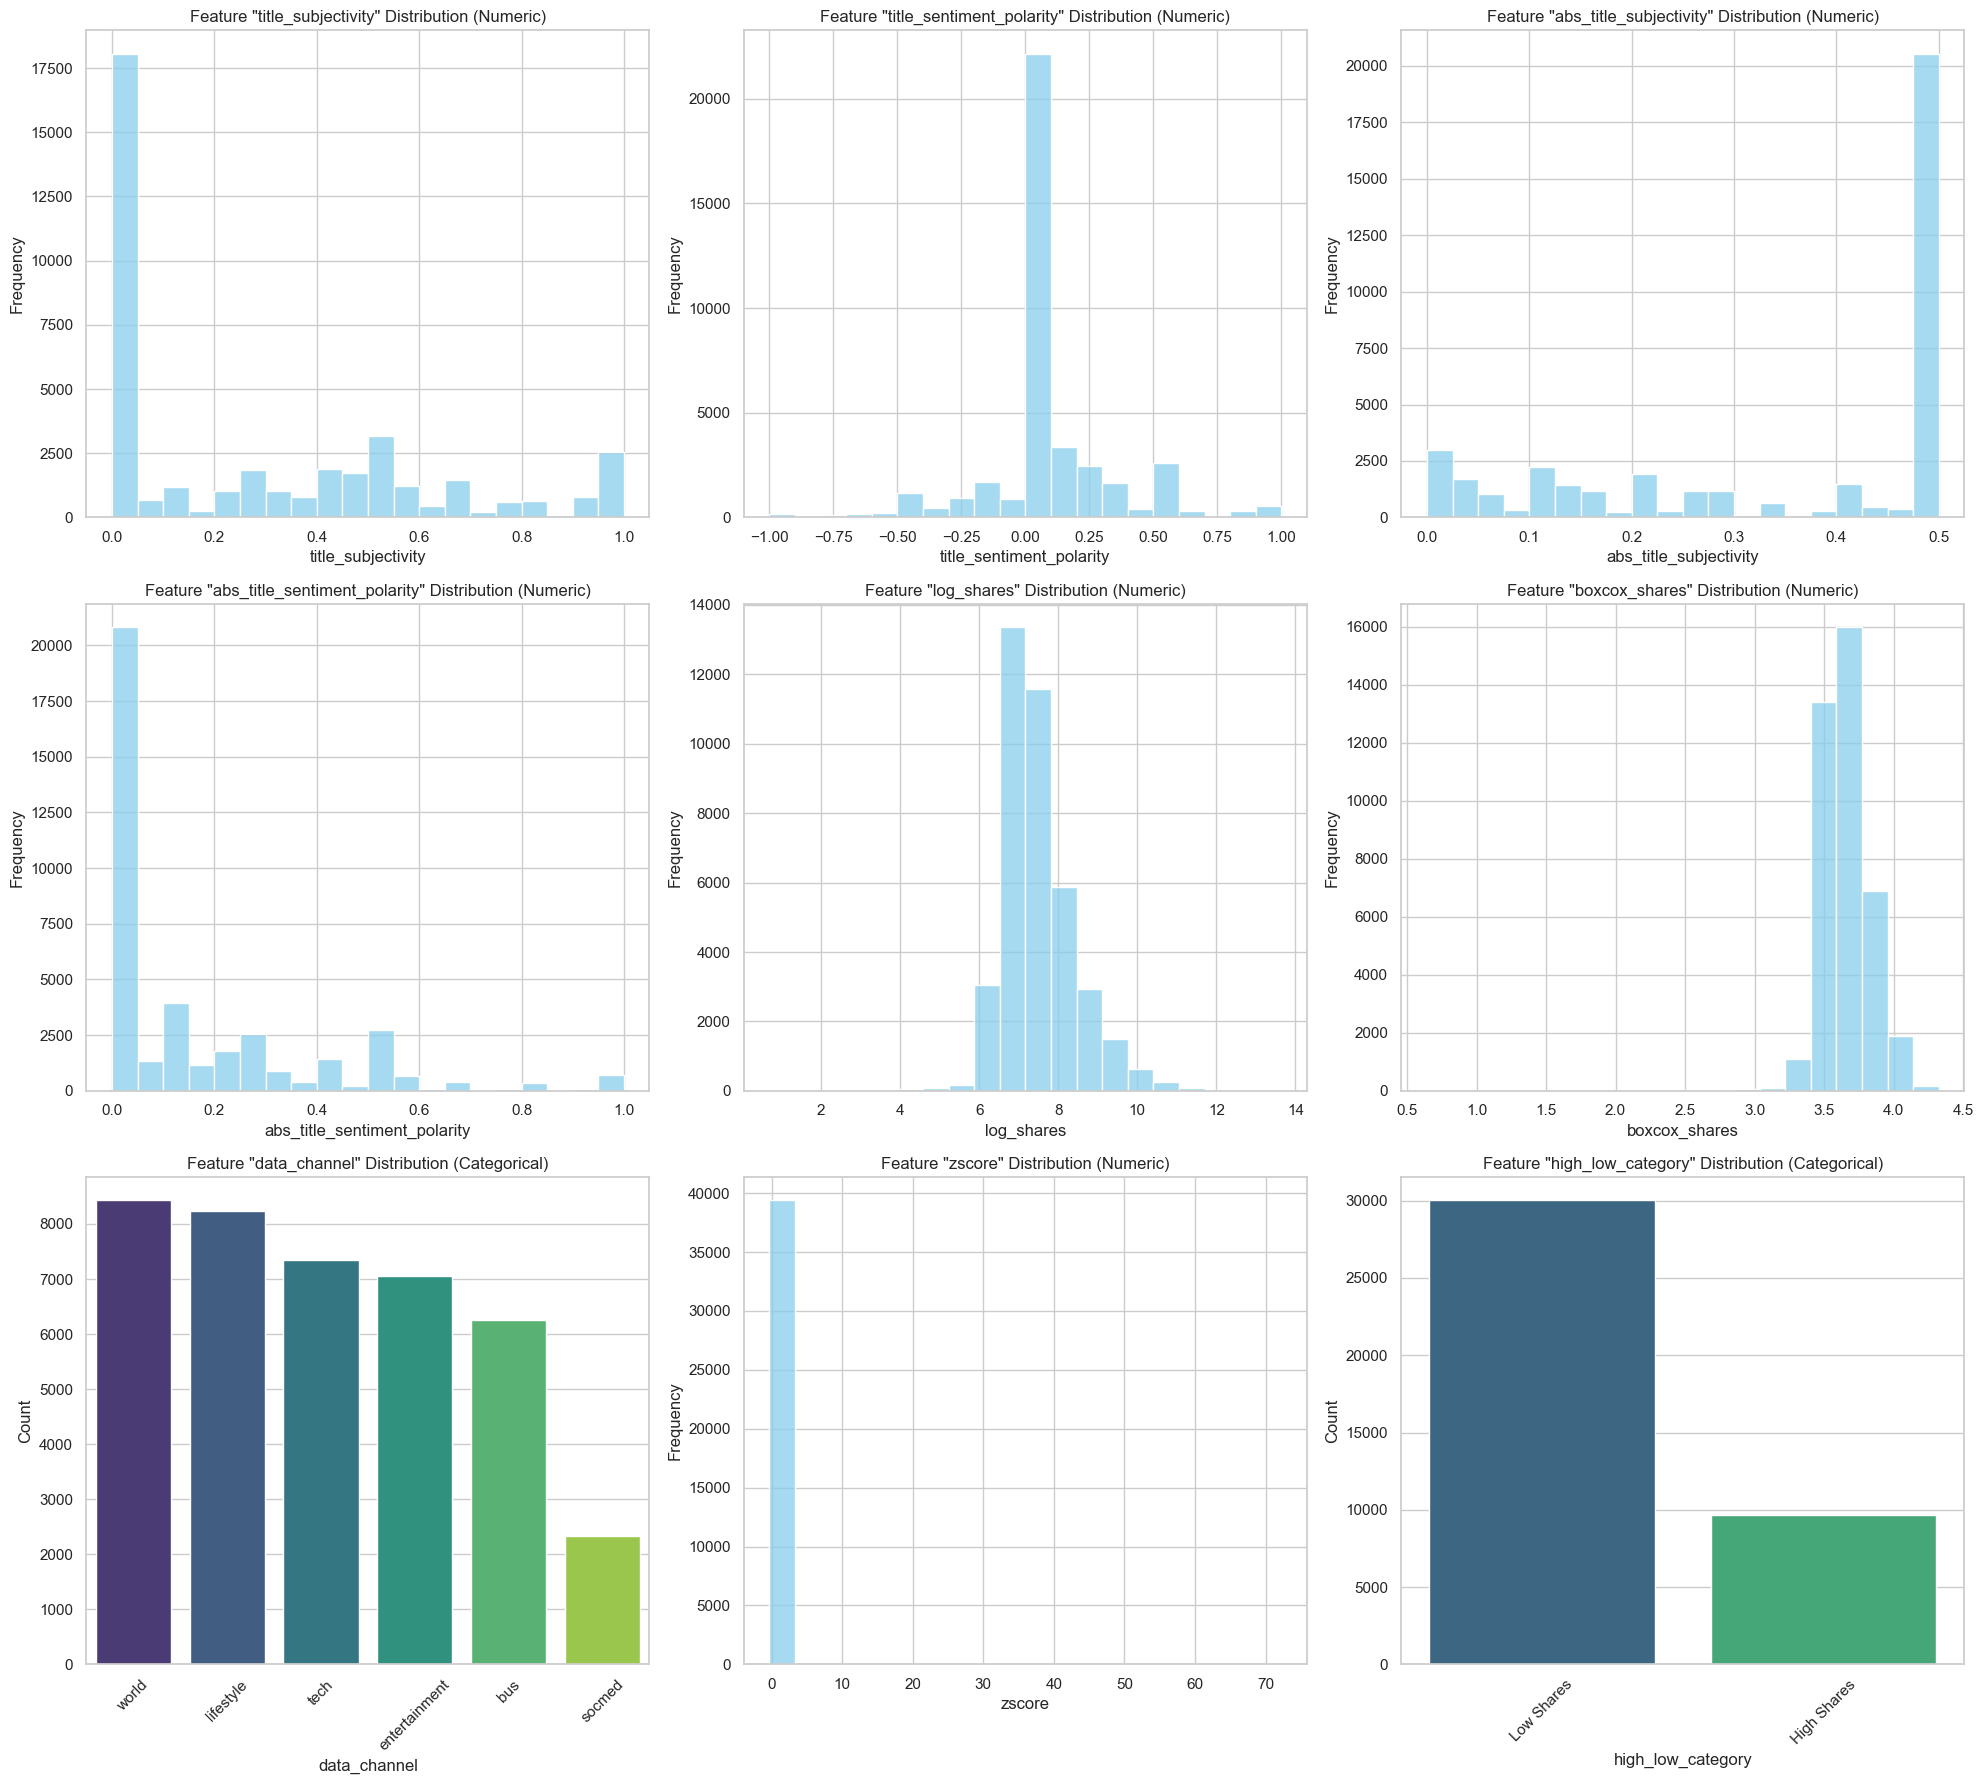

In [51]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math


df_sample = train

# Set Seaborn style (optional)
sns.set(style="whitegrid")

# Define how many plots per page
plots_per_page = 9
n_features = len(df_sample.columns)
n_pages = math.ceil(n_features / plots_per_page)
columns = df_sample.columns  # List of column names

# Loop over pages
for page in range(n_pages):
    # Create a 3x3 grid of subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 18))
    axes = axes.flatten()  # Flatten the grid for easy iteration
    
    # Loop over each subplot on the current page
    for i in range(plots_per_page):
        index = page * plots_per_page + i
        if index >= n_features:
            # Hide any extra subplots on the last page
            axes[i].axis('off')
        else:
            col = columns[index]
            ax = axes[i]
            
            # Plot numeric features with histogram; categorical with countplot
            if pd.api.types.is_numeric_dtype(df_sample[col]):
                sns.histplot(df_sample[col], kde=False, bins=20, color='skyblue', ax=ax)
                ax.set_xlabel(col)
                ax.set_ylabel('Frequency')
                ax.set_title(f'Feature "{col}" Distribution (Numeric)')
            else:
                order = df_sample[col].value_counts().index
                sns.countplot(x=df_sample[col], order=order, palette='viridis', ax=ax)
                ax.set_xlabel(col)
                ax.set_ylabel('Count')
                ax.set_title(f'Feature "{col}" Distribution (Categorical)')
                ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

In [53]:
import pandas as pd
import numpy as np

skew_values = {}
for col in train.columns:
    if pd.api.types.is_numeric_dtype(train[col]):
        skew_values[col] = train[col].skew()
    else:
        skew_values[col] = 'N/A' 

for feature, skew_val in skew_values.items():
    print(f"{feature}: {skew_val}")

n_tokens_title: 0.16532037674928027
n_tokens_content: 2.9454219387867084
n_unique_tokens: 198.65511559825592
n_non_stop_words: 198.7924453768874
n_non_stop_unique_tokens: 198.44329440926512
num_hrefs: 4.013494828201318
num_self_hrefs: 5.172751105757634
num_imgs: 3.9465958446535474
num_videos: 7.0195327862958665
average_token_length: -4.57601155020474
num_keywords: -0.14725125199950523
data_channel_is_lifestyle: 3.9930191433554167
data_channel_is_entertainment: 1.68358480940472
data_channel_is_bus: 1.8768701859879158
data_channel_is_socmed: 3.758879630973088
data_channel_is_tech: 1.6199757646890423
data_channel_is_world: 1.4051693841208097
kw_min_min: 2.3749472801825444
kw_max_min: 35.32843373115432
kw_avg_min: 31.306108102660584
kw_min_max: 10.386371634782769
kw_max_max: -2.6449817621966782
kw_avg_max: 0.6243096463608944
kw_min_avg: 0.4679758464905322
kw_max_avg: 16.41166955537124
kw_avg_avg: 5.760177291618559
self_reference_min_shares: 26.264364160300094
self_reference_max_shares: 13.

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

# Boolean features (skip processing)
boolean_features = [
    'data_channel_is_lifestyle',
    'data_channel_is_entertainment',
    'weekday_is_monday',
    'weekday_is_tuesday',
    'weekday_is_wednesday',
    'weekday_is_thursday',
    'weekday_is_friday',
    'weekday_is_saturday',
    'weekday_is_sunday',
    'is_weekend',
    'data_channel_is_bus',
    'data_channel_is_socmed',
    'data_channel_is_tech',
    'data_channel_is_world'
]

# Predefined skewness values for each feature
skew_values = {
    'n_tokens_title': 0.16532037674928027,
    'n_tokens_content': 2.9454219387867084,
    'n_unique_tokens': 198.65511559825592,
    'n_non_stop_words': 198.7924453768874,
    'n_non_stop_unique_tokens': 198.44329440926512,
    'num_hrefs': 4.013494828201318,
    'num_self_hrefs': 5.172751105757634,
    'num_imgs': 3.9465958446535474,
    'num_videos': 7.0195327862958665,
    'average_token_length': -4.57601155020474,
    'num_keywords': -0.14725125199950523,
    'kw_min_min': 2.3749472801825444,
    'kw_max_min': 35.32843373115432,
    'kw_avg_min': 31.306108102660584,
    'kw_min_max': 10.386371634782769,
    'kw_max_max': -2.6449817621966782,
    'kw_avg_max': 0.6243096463608944,
    'kw_min_avg': 0.4679758464905322,
    'kw_max_avg': 16.41166955537124,
    'kw_avg_avg': 5.760177291618559,
    'self_reference_min_shares': 26.264364160300094,
    'self_reference_max_shares': 13.870849049433598,
    'self_reference_avg_sharess': 17.9140933776756,
    'LDA_00': 1.5674632332004765,
    'LDA_01': 2.0867218234169407,
    'LDA_02': 1.311694902028395,
    'LDA_03': 1.2387159863782728,
    'LDA_04': 1.1731294759766238,
    'global_subjectivity': -1.3726888305603973,
    'global_sentiment_polarity': 0.10545709665820545,
    'global_rate_positive_words': 0.32304661115048916,
    'global_rate_negative_words': 1.491917309190822,
    'rate_positive_words': -1.423105853002299,
    'rate_negative_words': 0.4072406539941212,
    'avg_positive_polarity': -0.7247949503201233,
    'min_positive_polarity': 3.0404677374643283,
    'max_positive_polarity': -0.9397564591253907,
    'avg_negative_polarity': -0.55164402900095,
    'min_negative_polarity': -0.07315481617331099,
    'max_negative_polarity': -3.4597470578480207,
    'title_subjectivity': 0.816084749635643,
    'title_sentiment_polarity': 0.39610883665169594,
    'abs_title_subjectivity': -0.6241493828840421,
    'abs_title_sentiment_polarity': 1.7041934399140888,
    'log_shares': 1.0264770065011177,
    'boxcox_shares': -0.2239496211569689,
    'zscore': 33.96388487571418
}

# Handling features based on skewness
for feature, skewness in skew_values.items():
    if feature in boolean_features:
        continue  # Skip boolean features

    if skewness > 10:  # Extremely high skewness
        print(f"Applying Yeo-Johnson transformation to {feature} (skewness={skewness:.2f})")
        transformer = PowerTransformer(method='yeo-johnson', standardize=False)
        df[feature] = transformer.fit_transform(df[[feature]])
    elif 2 < skewness <= 10:  # Moderate skewness
        print(f"Applying square root transformation to {feature} (skewness={skewness:.2f})")
        df[feature] = np.sqrt(df[feature])
    elif skewness < -10:  # Extreme negative skewness
        print(f"Applying inverse transformation to {feature} (skewness={skewness:.2f})")
        df[feature] = -1 / (df[feature] + 1e-5)  # Avoid division by zero
    elif -10 < skewness < -2:  # Moderate negative skewness
        print(f"Applying square root transformation to {feature} (skewness={skewness:.2f})")
        df[feature] = -np.sqrt(-df[feature])  # Use negative square root for left-skewed data
    else:
        print(f"No transformation applied to {feature} (skewness={skewness:.2f})")

# Final check
print("\nFeature processing completed!")


No transformation applied to n_tokens_title (skewness=0.17)
Applying square root transformation to n_tokens_content (skewness=2.95)
Applying Yeo-Johnson transformation to n_unique_tokens (skewness=198.66)
Applying Yeo-Johnson transformation to n_non_stop_words (skewness=198.79)
Applying Yeo-Johnson transformation to n_non_stop_unique_tokens (skewness=198.44)
Applying square root transformation to num_hrefs (skewness=4.01)
Applying square root transformation to num_self_hrefs (skewness=5.17)
Applying square root transformation to num_imgs (skewness=3.95)
Applying square root transformation to num_videos (skewness=7.02)
Applying square root transformation to average_token_length (skewness=-4.58)
No transformation applied to num_keywords (skewness=-0.15)
Applying square root transformation to kw_min_min (skewness=2.37)
Applying Yeo-Johnson transformation to kw_max_min (skewness=35.33)
Applying Yeo-Johnson transformation to kw_avg_min (skewness=31.31)
Applying Yeo-Johnson transformation to

In [ ]:
skew_values = {}
for col in train.columns:
    if pd.api.types.is_numeric_dtype(train[col]):
        skew_values[col] = df[col].skew()
    else:
        skew_values[col] = 'N/A' 

for feature, skew_val in skew_values.items():
    print(f"{feature}: {skew_val}")

In [57]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Ensure that XGBoost training data does not have an object type
train = train.astype({col: "category" for col in train.select_dtypes("object").columns})

# target variable
y = df['shares']

# Divide the training set and test set
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42)

# Training the XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", 
                             n_estimators=100, 
                             learning_rate=0.1, 
                             max_depth=6,
                             enable_categorical=True)
xgb_model.fit(X_train, y_train)

# predict
y_pred = xgb_model.predict(X_test)

# valuation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"XGBoost MSE: {mse:.2f}")
print(f"XGBoost R²: {r2:.4f}")



XGBoost MSE: 82313259.89
XGBoost R²: 0.3179


In [59]:
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=3, shuffle=True, random_state=42)
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", 
                             n_estimators=100, 
                             learning_rate=0.1, 
                             max_depth=6, 
                             enable_categorical=True)

r2_scores = []
for train_index, test_index in kf.split(train):
    X_train, X_test = train.iloc[train_index], train.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

print(f"Cross-Validation R² Scores: {r2_scores}")
print(f"Mean R²: {np.mean(r2_scores):.4f}")



Cross-Validation R² Scores: [0.164474806524187, 0.35895679348656573, 0.46374734903882375]
Mean R²: 0.3291


In [61]:
import numpy as np

# Target variable transformation
y = df['log_shares']  # Using log-transformed shares

# K-Fold cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

kf = KFold(n_splits=3, shuffle=True, random_state=42)

xgb_model = xgb.XGBRegressor(objective="reg:squarederror",
                             n_estimators=300,
                             learning_rate=0.05,
                             max_depth=6,
                             subsample=0.8,
                             colsample_bytree=0.8,
                             reg_alpha=0.1,
                             reg_lambda=1.0,
                             enable_categorical=True)

r2_scores = []
for train_index, test_index in kf.split(train):
    X_train, X_test = train.iloc[train_index], train.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model.fit(X_train, y_train)
    y_pred_log = xgb_model.predict(X_test)
    
    # Invert log_shares back to shares
    y_pred = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test)

    r2 = r2_score(y_test_original, y_pred)
    r2_scores.append(r2)

print(f"Cross-Validation R² Scores: {r2_scores}")
print(f"Mean R²: {np.mean(r2_scores):.4f}")


Cross-Validation R² Scores: [0.6662796037972061, 0.6228160039331156, 0.5467328676688462]
Mean R²: 0.6119


In [63]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # To save the model

# Train the final XGBoost model with best hyperparameters
best_xgb = xgb.XGBRegressor(
    objective="reg:squarederror",
    subsample=0.8,
    reg_lambda=1.5,
    reg_alpha=0.1,
    n_estimators=500,
    max_depth=6,
    learning_rate=0.01,
    colsample_bytree=0.8,
    enable_categorical=True
)

# Fit the model on the training data
best_xgb.fit(X_train, y_train)

# Make predictions
y_pred_log = best_xgb.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Transform back from log scale
y_test_original = np.expm1(y_test)  # Transform back the true values

# Evaluate model performance
mse_best = mean_squared_error(y_test_original, y_pred)
r2_best = r2_score(y_test_original, y_pred)

# Print final evaluation metrics
print(f"Tuned XGBoost MSE: {mse_best:.2f}")
print(f"Tuned XGBoost R²: {r2_best:.4f}")

# Save the trained model for future use
joblib.dump(best_xgb, "best_xgboost_model.pkl")
print("Model saved as 'best_xgboost_model.pkl'")


Tuned XGBoost MSE: 65283084.33
Tuned XGBoost R²: 0.5436
Model saved as 'best_xgboost_model.pkl'


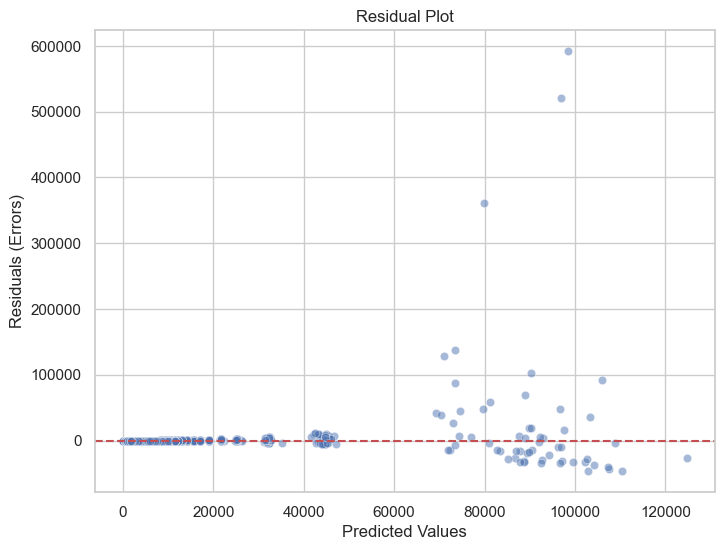

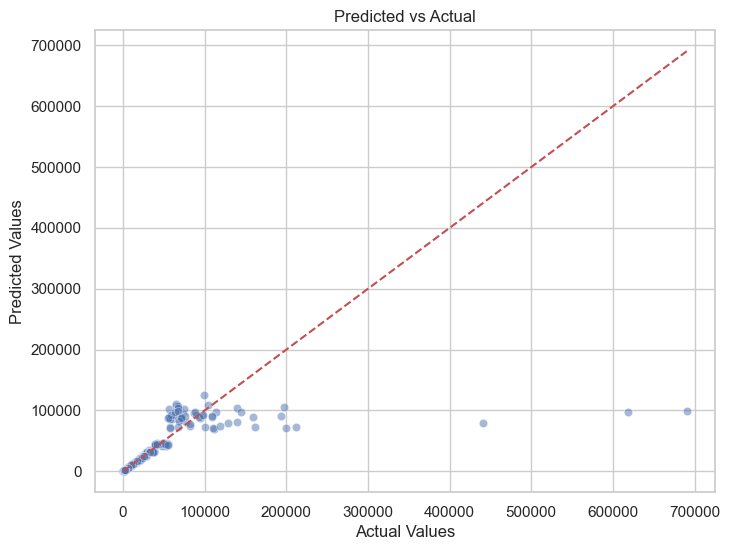

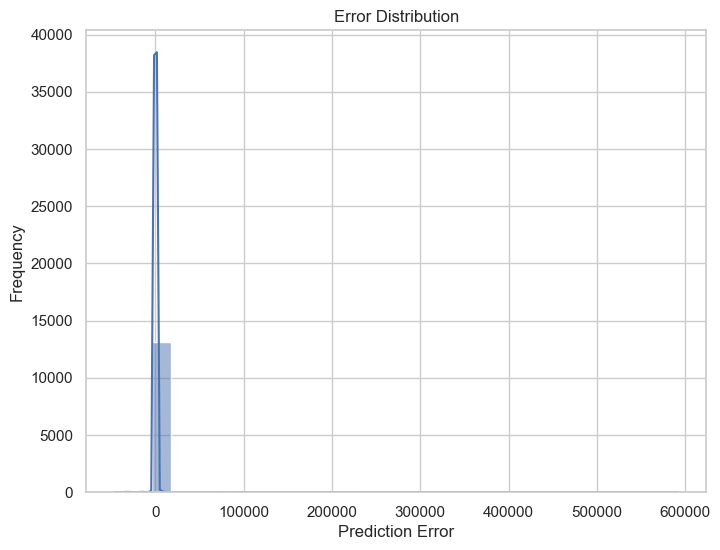

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute residuals (errors)
residuals = y_test_original - y_pred

# 1️⃣ Residual Plot: Check how residuals are distributed
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")
plt.show()

# 2️⃣ Predicted vs. Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_original, y=y_pred, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], 
         [min(y_test_original), max(y_test_original)], 
         color='r', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.show()

# 3️⃣ Error Distribution Plot
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.show()


In [71]:
print("Missing values in X_train:")
print(X_train.isnull().sum())

print("Missing values in X_test:")
print(X_test.isnull().sum())


Missing values in X_train:
n_tokens_title              0
n_tokens_content            0
n_unique_tokens             0
n_non_stop_words            0
n_non_stop_unique_tokens    0
                           ..
log_shares                  0
boxcox_shares               0
data_channel                0
zscore                      0
high_low_category           0
Length: 63, dtype: int64
Missing values in X_test:
n_tokens_title              0
n_tokens_content            0
n_unique_tokens             0
n_non_stop_words            0
n_non_stop_unique_tokens    0
                           ..
log_shares                  0
boxcox_shares               0
data_channel                0
zscore                      0
high_low_category           0
Length: 63, dtype: int64


In [75]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Convert categorical columns from "category" type to string for OneHotEncoder
X_train = X_train.copy()
X_test = X_test.copy()

X_train['data_channel'] = X_train['data_channel'].astype(str)
X_test['data_channel'] = X_test['data_channel'].astype(str)

X_train['high_low_category'] = X_train['high_low_category'].astype(str)
X_test['high_low_category'] = X_test['high_low_category'].astype(str)

# Identify categorical and numerical features
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()
num_features = X_train.select_dtypes(include=['float64']).columns.tolist()

# Preprocessing: OneHotEncoder for categorical features, StandardScaler for numerical features
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False), cat_features),
    ('scaler', StandardScaler(), num_features)
])

# Transform X_train and X_test before passing to SVR
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Define SVR model
svr = SVR()

# Define hyperparameter search space
param_dist = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1.0],
    'gamma': ['scale', 'auto']
}

# Randomized search for best hyperparameters
random_search_svr = RandomizedSearchCV(
    svr,
    param_distributions=param_dist,
    n_iter=3,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

# Train the model with hyperparameter tuning
random_search_svr.fit(X_train_transformed, y_train)

# Display the best hyperparameters found
print(f"Best SVR Parameters: {random_search_svr.best_params_}")

# Train the final model with best parameters
best_svr = random_search_svr.best_estimator_
best_svr.fit(X_train_transformed, y_train)

# Make predictions
y_pred_log = best_svr.predict(X_test_transformed)
y_pred = np.expm1(y_pred_log)  # Reverse log transformation
y_test_original = np.expm1(y_test)

# Calculate evaluation metrics
mse_best = mean_squared_error(y_test_original, y_pred)
r2_best = r2_score(y_test_original, y_pred)

# Print results
print(f"Tuned SVR MSE: {mse_best:.2f}")
print(f"Tuned SVR R²: {r2_best:.4f}")

# Save the trained SVR model
joblib.dump(best_svr, "best_svr_model.pkl")
print("Model saved as 'best_svr_model.pkl'")


Best SVR Parameters: {'gamma': 'scale', 'epsilon': 0.01, 'C': 100}
Tuned SVR MSE: 96607693.85
Tuned SVR R²: 0.3246
Model saved as 'best_svr_model.pkl'


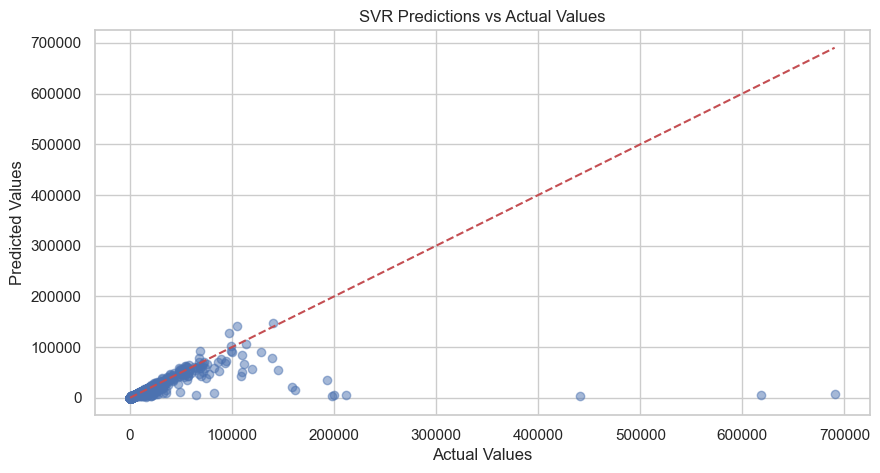

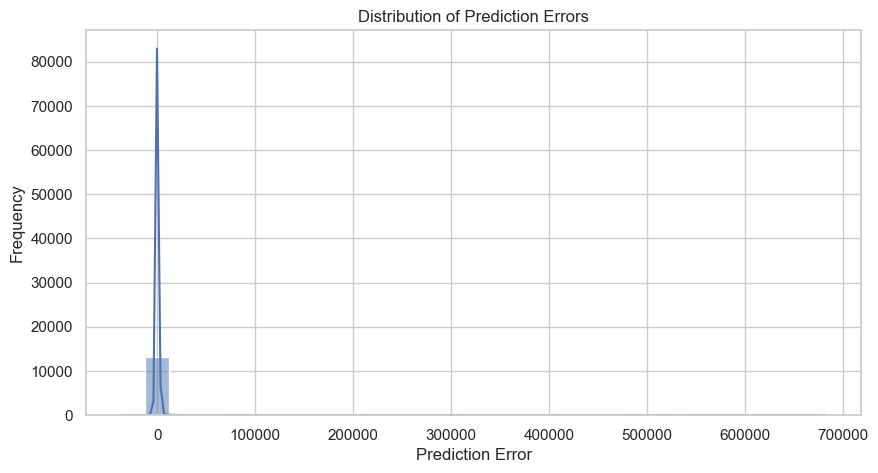

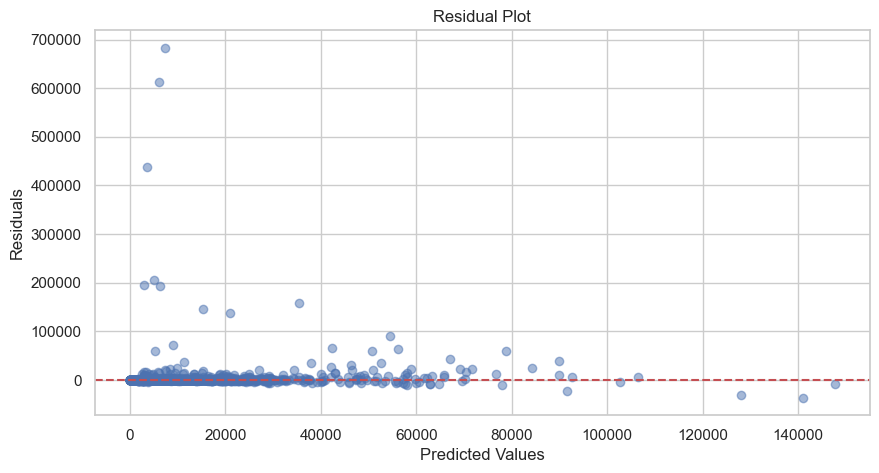

In [ ]:

# Visualization
plt.figure(figsize=(10, 5))
plt.scatter(y_test_original, y_pred, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], '--r')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR Predictions vs Actual Values")
plt.show()

# Error distribution
errors = y_test_original - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()

# Residual plot
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, errors, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(best_svr, X_train_transformed, y_train, cv=3, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 5))
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
